## BIA 656 Advanced Data Analytics and Machine Learning - Class Project

### *Authors: Aayush Bakre, Ajanya Sharma*

### Table of Contents
- Problem Description
- Evaluation
- Dataset
- Setup Imports & Variables
- Exploring the Data 

## Problem Discription

![alt text](https://gray-wafb-prod.cdn.arcpublishing.com/resizer/ELLb-0F79fu-eD2nA4_46JmkiJs=/1200x675/smart/filters:quality(85)/cloudfront-us-east-1.images.arcpublishing.com/gray/YT67CCYJY5FDNJDURKRAGZYETY.jpg)

### PPP Loan Fraud Detection

The Paycheck Protection Program (PPP) is a loan program created by the U.S. government in 2020 to help certain businesses, self-employed workers, sole proprietors, nonprofit organizations, and tribal businesses keep paying their workers during the COVID-19 pandemic. PPP loans are private loans with low interest rates that can be used to cover payroll costs, rent, interest, and utilities. The loan amount is based on the average monthly payroll costs of the applicant and can be forgiven if the business keeps its employee count and wages stable. The program is run by the U.S. Small Business Administration and the deadline to apply for a PPP loan was March 31, 2021.

The project is aimed at exploring loan data from the Paycheck Protection Program (PPP), which provided relief to small and medium-sized businesses during the COVID-19 pandemic. The primary objective is to create graphical visualizations of the data and apply anomaly detection methods to identify potentially fraudulent loans. The project outline suggests a few starting points, including reviewing news stories on fraud in the PPP loan program, downloading the full PPP loan dataset and data dictionary, summarizing the data through tabular summaries and graphical visualizations, investigating loans that have a high potential for fraud by grouping together loans in common categories and identifying outlier loans, and exploring the use of traditional unsupervised learning techniques such as anomaly detection.

## Evaluation

The dataset is a collection of entries on the PPP Loan Fraud application form. There is no training or a test dataset. Initial review doesn't point towards any strong correlations and predictors that would categorize the problem as a predictive or a dependence exerceise. At first glance, the dataset seems to be a good fit for unsupervised outlier detection methods just as the Project Brief suggests. 


## Approach to Analysis

In order to better understand the PPP Loan dataset, we investigated the data and performed initial exploratory analysis along with data visualizations. 

Bringing in the dataset and cleaning the data, which includes handling missing values and fixing inconsistent formatting using tranformations, will be the first steps in getting the data ready for analysis. Following that, we normalized selective features of the dataset to ensure meaningful variability that would better support the analysis. 

In order to acquire a deeper understanding of the data, we visualized it using a variety of visualization techniques, including line charts, histograms, correlation matrix, and heatmaps.

### Fraud Detection Techniques

We employed three approaches to Fraud Detection. 

1. Calculating risk scores for each loan application by comparing its key attributes (Jobs Reported, Loan Amounts, and Loan Amounts per Employee) to other businesses of the same size in the same industry to rank extremely atypical loan applications.  

2. Next, we applied the machine-learning algorithm, Isolation Forest anomaly detection, to forecast anomaly scores for loan application to find the most anomalous loans, which could be signs of PPP loan fraud.

In both the cases above, we treated the high risk and anomaly scores over a threshhold as potentially fraudulent. 

3. Finally, we checked the dataset against specific conditionalities and logic, which we believed if the loan applications are displaying, would make those applications fraudulent. 

Finally, we also conducted exploratory studies on the resulting fraud-identified data to find additional patterns, connections, and trends.

The way this study is designed, we approached with the intention to aid analysts at SBA and other relevant agencies to help investigate fraud and gain insight into the PPP Loan dataset with identification of probable PPP loan frauds.

## Dataset

The dataset is sourced from the official SBA website which can be accessed using the following URL:
https://data.sba.gov/dataset/ppp-foia/resource/aab8e9f9-36d1-42e1-b3ba-e59c79f1d7f0?inner_span=True

## Setup Imports and Variables

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

### Read the Data

Read the first few entries

In [124]:
# Read in CSV file
df = pd.read_csv('public_150k_plus_230101.csv')

# View first few rows of data
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


Read the last five entries

In [125]:
# View last few rows of data
df.tail()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
968526,4395967002,04/03/2020,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,01/13/2021,...,Corporation,42366,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN,151037.50,12/09/2020
968527,6985647108,04/14/2020,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,12/08/2020,...,Non-Profit Childcare Center,122813,NebraskaLand Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y,150789.04,11/03/2020
968528,7996438405,02/12/2021,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,09/15/2021,...,Subchapter S Corporation,77189,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN,150743.84,08/17/2021
968529,9054647103,04/15/2020,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,03/08/2022,...,Corporation,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN,152820.83,02/23/2022
968530,9184687004,04/09/2020,897,PPP,S & S JOHNSON ENTERPRISES INC,7342 Granite Loop Rd,TETON VILLAGE,WY,83025-0550,10/22/2021,...,Subchapter S Corporation,77193,Bank of Jackson Hole Trust,JACKSON,WY,Unanswered,Unanswered,NaN,152162.50,09/22/2021


Observed misread values in columns with dates. So next we call information about data types and missing values

In [126]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               942818 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

Now we call for summary statistics for the variables

In [127]:
# Get summary statistics for numerical columns
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,9.685310e+05,968531.000000,968531.000000,968531.0,9.685310e+05,9.685310e+05,9.684840e+05,968531.000000,968530.000000,961903.000000,3.393770e+05,9.666990e+05,4.618300e+04,9.953300e+04,2.285500e+04,5.744600e+04,3.171700e+04,968531.000000,9.388850e+05
mean,5.427137e+09,571.519065,36.377761,100.0,5.322537e+05,5.306221e+05,1.515947e+01,108106.652551,51.886148,511805.521357,1.492980e+04,5.148787e+05,4.815543e+04,5.619529e+04,6.897797e+03,4.686043e+04,1.435866e+04,107644.444761,5.285127e+05
std,2.551313e+09,263.024816,17.291796,0.0,7.442514e+05,7.378871e+05,4.109778e+03,133018.400599,67.550965,181178.016548,8.493622e+04,7.140568e+05,1.590929e+05,1.113755e+05,6.214069e+04,1.029112e+05,5.549347e+04,134878.837316,7.315001e+05
min,1.000007e+09,101.000000,0.000000,100.0,0.000000e+00,1.500000e+05,0.000000e+00,20.000000,0.000000,111110.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.000000,1.000000e-02
25%,3.271108e+09,373.000000,24.000000,100.0,2.002000e+05,2.004000e+05,0.000000e+00,29805.000000,18.000000,336612.000000,1.000000e+00,1.956000e+05,0.000000e+00,1.352500e+04,0.000000e+00,8.000000e+03,0.000000e+00,29805.000000,2.008463e+05
50%,5.400677e+09,515.000000,24.000000,100.0,2.951770e+05,2.950000e+05,0.000000e+00,56102.000000,30.000000,541211.000000,1.000000e+00,2.870793e+05,1.000000e+04,2.887300e+04,0.000000e+00,1.944000e+04,5.000000e+02,56102.000000,2.951752e+05
75%,7.546303e+09,811.000000,60.000000,100.0,5.402000e+05,5.393843e+05,0.000000e+00,117436.000000,54.000000,623110.000000,4.500000e+03,5.246035e+05,4.025550e+04,5.625000e+04,0.000000e+00,4.400000e+04,9.908000e+03,112407.000000,5.399421e+05
max,9.999007e+09,1094.000000,180.000000,100.0,1.000000e+07,1.000000e+07,2.400000e+06,538160.000000,500.000000,999990.000000,1.000000e+07,1.000000e+07,1.000000e+07,5.518278e+06,2.951590e+06,3.880000e+06,2.497617e+06,533479.000000,1.026528e+07


We retrieve the exact counts of missing values for each variable. 

In [128]:
# Count the number of rows with missing values in each column
num_missing = df.isnull().sum(axis=0)

print(f"Total number of rows with missing values: {num_missing}")

Total number of rows with missing values: LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  25713
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndic

Total number of observations with at least one missing variable

In [129]:
# Count the number of rows with missing values
num_rows_missing = (df.isnull().sum(axis=1) > 0).sum()

print(f"Total number of rows with missing values: {num_rows_missing}")

Total number of rows with missing values: 968530


Total number of rows with missing values is the same as the total observations in the dataset. This means that all observations have at least one null value. Upon looking closely at the dataset and the data dictionary, we can say that it may be because some of the variables are mutually exclusive responses to form questions. 

## Data Transformation and Feature Introduction

Given that we now have an overview of the dataset. We can now carried out initial tranformations which will allow us to break down and visualize individual elements of the dataset such as processing methods, approval dates, forgiveness dates, and loan amounts with respect to business size and employees. We can also use this opportunity to construct feature variables that may help us derive a more meaningful interpretation from the analysis.  

First, we transform columns with misinterpreted dates to correctly identify and validaate date values 

In [130]:
# Transform columns with date values from Object DType to DateTime DType
df[['DateApproved', 'LoanStatusDate', 'ForgivenessDate']] = df[['DateApproved', 'LoanStatusDate', 'ForgivenessDate']].apply(pd.to_datetime)
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,2020-11-20
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,2021-08-12
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,2021-03-17,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,2021-02-10
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,2021-09-10
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,2021-04-08


Given the high variability in the loan amounts sanctioned, lets introduce a feature containing normalized loan amounts by adjusting the loan amounts for the number of employees disclosed. 

In [131]:
df['loan_amount_per_employee'] = df['CurrentApprovalAmount'] / df['JobsReported']
#do box plot, try to find min, max and any outliers

In [132]:
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,loan_amount_per_employee
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,2020-11-20,12409.012581
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,2021-08-12,10094.901233
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,2021-03-17,...,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,2021-02-10,9218.066667
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,2021-09-10,23803.380952
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,2021-04-08,14697.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,42366,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN,151037.50,2020-12-09,10000.000000
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,122813,NebraskaLand Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y,150789.04,2020-11-03,3571.428571
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,77189,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN,150743.84,2021-08-17,30000.000000
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN,152820.83,2022-02-23,21428.571429


### Let's import NAICS Industry Descriptions, Industry Size standards in millions of dollars, and Size standards in number of employees based on NAICS Code into the dataframe. 

In [133]:
naicsdata=pd.read_excel('Table of Size Standards_Effective March 17, 2023.xlsx',sheet_name='table_of_size_standards-all')
naicsdata.head()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2.25,NaN,NaN
3,111120,Oilseed (except Soybean) Farming,2.25,NaN,NaN
4,111130,Dry Pea and Bean Farming,2.75,NaN,NaN


In [134]:
naicsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NAICS Codes                             1082 non-null   object 
 1   NAICS Industry Description              1019 non-null   object 
 2   Size standards 
in millions of dollars  513 non-null    object 
 3   Size standards in number of employees   483 non-null    float64
 4   Footnotes                               37 non-null     object 
dtypes: float64(1), object(4)
memory usage: 43.3+ KB


In [135]:
unique_values = naicsdata.nunique()

# Print the result
print(unique_values)

NAICS Codes                                1082
NAICS Industry Description                 1015
Size standards \nin millions of dollars      74
Size standards in number of employees        27
Footnotes                                    17
dtype: int64


In [136]:
naicsdata.dropna(subset=['NAICS Codes'])


,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2.25,NaN,NaN
3,111120,Oilseed (except Soybean) Farming,2.25,NaN,NaN
4,111130,Dry Pea and Bean Farming,2.75,NaN,NaN
5,111140,Wheat Farming,2.25,NaN,NaN
...,...,...,...,...,...
1098,813910,Business Associations,15.5,NaN,NaN
1099,813920,Professional Organizations,23.5,NaN,NaN
1100,813930,Labor Unions and Similar Labor Organizations,16.5,NaN,NaN
1101,813940,Political Organizations,14,NaN,NaN


In [137]:
df = df.dropna(subset=['NAICSCode'])

missing_count = df['NAICSCode'].isna().sum()
missing_count

0

### Creating columns for NAICS Industry Description, Size standards in millions of dollars, and Size standards in number of employees


In [138]:
# Create a dictionary mapping NAICS Codes to NAICS Industry Description in naicsdata
naics_dict = dict(zip(naicsdata['NAICS Codes'], naicsdata['NAICS Industry Description']))

# Create a dictionary mapping NAICS Codes to Size standards \nin millions of dollars in naicsdata
naics_dict2 = dict(zip(naicsdata['NAICS Codes'], naicsdata['Size standards \nin millions of dollars']))

# Create a dictionary mapping NAICS Codes to Size standards in number of employees in naicsdata
naics_dict3 = dict(zip(naicsdata['NAICS Codes'], naicsdata['Size standards in number of employees']))

# Create a new column in df (public_150k_plus_230101.csv) with the values from the NAICS Industry Description in naicsdata
df['NAICS Industry Description'] = df['NAICSCode'].map(naics_dict)

# Create a new column in df (public_150k_plus_230101.csv) with the values from the NAICS Industry Description in naicsdata
df['Size standards \nin millions of dollars'] = df['NAICSCode'].map(naics_dict2)

# Create a new column in df (public_150k_plus_230101.csv) with the values from the NAICS Industry Description in naicsdata
df['Size standards in number of employees'] = df['NAICSCode'].map(naics_dict3)

df.head()

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/1652607285.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/1652607285.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/1652607285.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,loan_amount_per_employee,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,GA,Unanswered,Unanswered,NaN,773553.37,2020-11-20,12409.012581,Paint and Coating Manufacturing,NaN,1000.0
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,GA,Male Owned,Non-Veteran,NaN,746336.24,2021-08-12,10094.901233,Landscaping Services,9.5,NaN
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,NC,Male Owned,Non-Veteran,NaN,395264.11,2021-09-10,23803.380952,New Single-family Housing Construction (Except...,45,NaN
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,OH,Unanswered,Unanswered,NaN,370819.35,2021-04-08,14697.480000,Used Household and Office Goods Moving,34,NaN
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,2021-11-17,...,OH,Unanswered,Unanswered,NaN,332137.41,2021-05-10,14947.272727,All Other Plastics Product Manufacturing,NaN,750.0


Looking for observed format inconsistencies in NAICSCode columns

In [139]:
# create a boolean mask to filter the data
mask = df['Size standards in number of employees'].isnull()

# use boolean indexing to filter the data and group by 'NAICS Codes'
naics_nullcounts = df.loc[mask].groupby('NAICSCode').size()

# print the counts of unique values in 'NAICS Codes' for rows where 'Size standards in number of employees' is null
naics_nullcounts

NAICSCode
111110.0     203
111120.0      34
111130.0      17
111140.0      54
111150.0     204
            ... 
926150.0      40
927110.0      27
928110.0      23
928120.0      30
999990.0    4090
Length: 727, dtype: int64

In [140]:
missing_count = df['Size standards in number of employees'].isna().sum()
missing_count

793572

In [141]:
# convert the 'NAICSCode' column to integer and then back to string
df['NAICSCode'] = df['NAICSCode'].astype(int).astype(str)

# show the transformed column
print(df['NAICSCode'])

0         325510
1         561730
3         236115
4         484210
5         326199
           ...  
968526    621210
968527    624410
968528    238210
968529    621610
968530    722511
Name: NAICSCode, Length: 961903, dtype: object


/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/865044654.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Imputing Null values with adjusted means for JobsReported by Industry Type as will be required for further analysis

In [142]:
# group by NAICSCode and calculate the mean of JobsReported
mean_jobs_reported = df.groupby('NAICSCode')['JobsReported'].mean()

# fill null values in Size standards in number of employees column with mean of JobsReported column
df['Size standards in number of employees'] = df.groupby('NAICSCode')['Size standards in number of employees'].apply(lambda x: x.fillna(mean_jobs_reported[x.name]))

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/2122538760.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/2122538760.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
missing_count = df['Size standards in number of employees'].isna().sum()
missing_count

0

Imputing Null values with adjusted means for CurrentApprovalAmount by Industry Type as will be required for further analysis

In [144]:
# group by NAICSCode and calculate the mean of # group by NAICSCode and calculate the mean of CurrentApprovalAmount
mean_CurrentApprovalAmount = df.groupby('NAICSCode')['CurrentApprovalAmount'].mean()

# fill null values in CurrentApprovalAmount column with mean of CurrentApprovalAmount by NAICSCode
df['CurrentApprovalAmount'] = df.groupby('NAICSCode')['CurrentApprovalAmount'].apply(lambda x: x.fillna(mean_jobs_reported[x.name]))

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/2207975816.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/2207975816.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
missing_count_CurrentApprovalAmount = df['CurrentApprovalAmount'].isna().sum()
missing_count_CurrentApprovalAmount

0

Imputing Null values with adjusted means for Loan Amopunt Per Employee by Industry Type as will be required for further analysis

In [146]:
# group by NAICSCode and calculate the mean of # group by NAICSCode and calculate the mean of loan_amount_per_employee
mean_loan_amount_per_employee = df.groupby('NAICSCode')['loan_amount_per_employee'].mean()

# fill null values in loan_amount_per_employee column with mean of loan_amount_per_employee by NAICSCode
df['loan_amount_per_employee'] = df.groupby('NAICSCode')['loan_amount_per_employee'].apply(lambda x: x.fillna(mean_loan_amount_per_employee[x.name]))

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/125080320.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/125080320.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
missing_count_loan_amount_per_employee = df['loan_amount_per_employee'].isna().sum()
missing_count_loan_amount_per_employee

0

## Now that we have executed the initial transformations, it is time to visualize the data! 

### Correlation Matrix to look at variable dependencies

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/3848384707.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

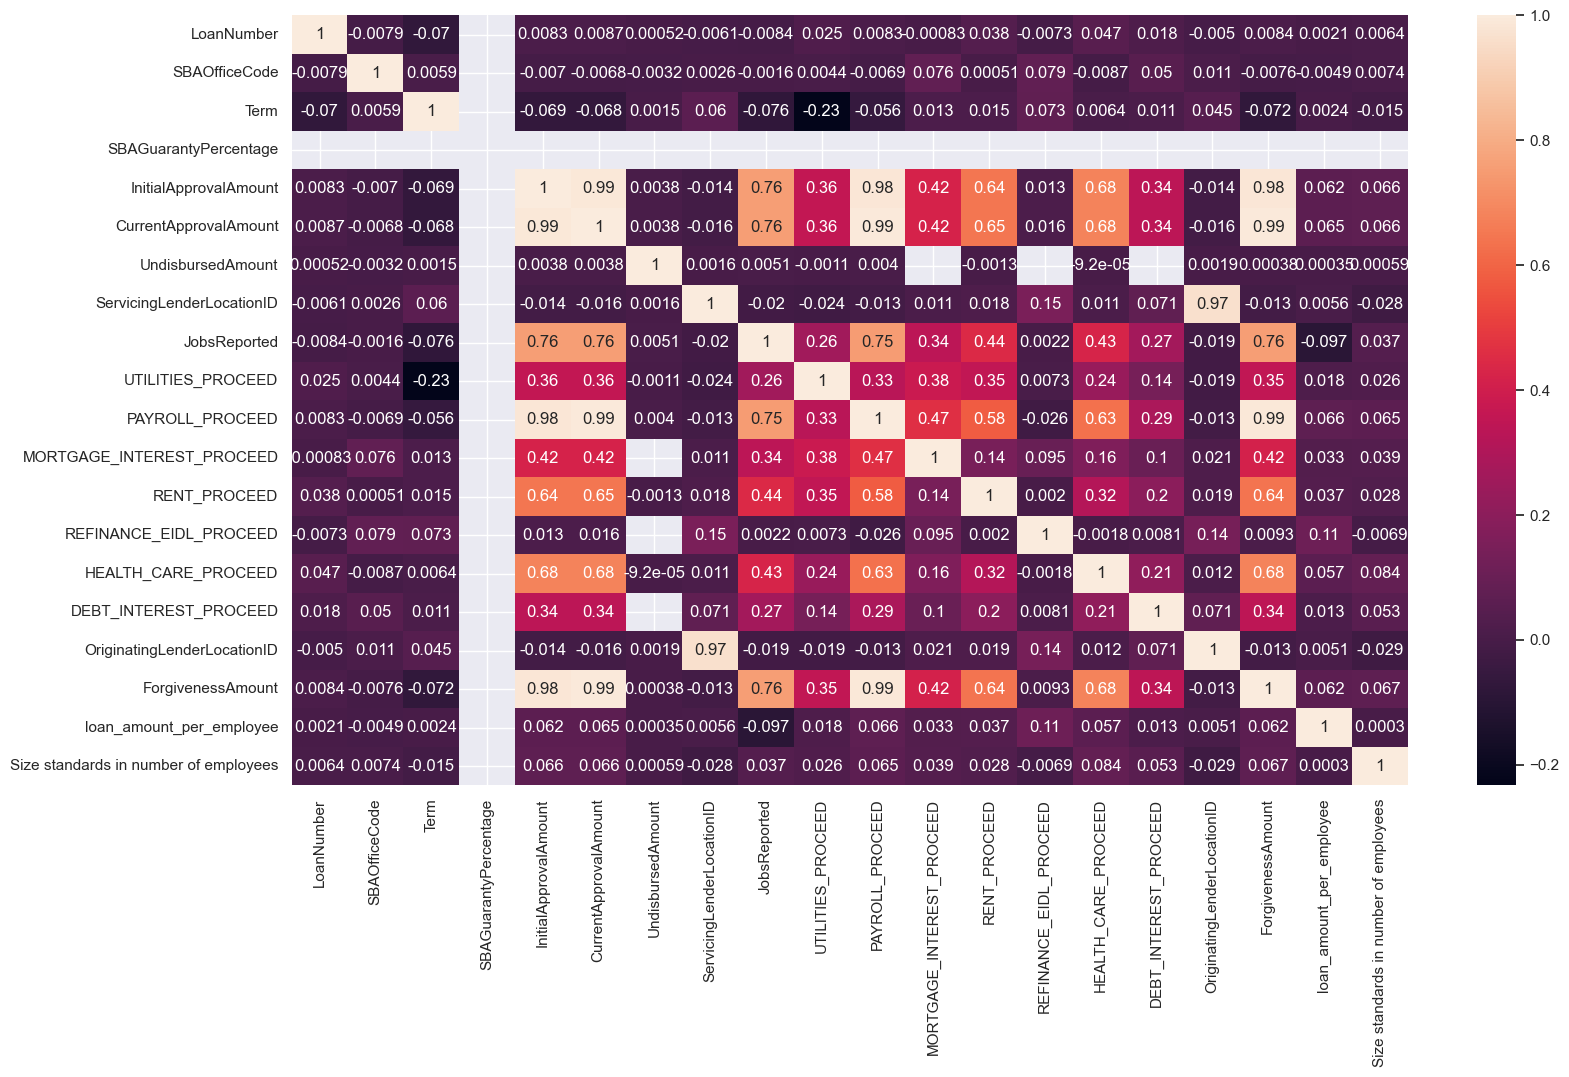

In [148]:
#correlation Matrix to study correlation between different variables
matrix=df.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(matrix, annot=True)

Key observations: High correlation between Payroll proceeds and Initial/Current Loan amounts. This suggests that most applications were applying to use the proceeds to process Payroll. 

Other observed correlations between LoanApproval Amounts and Forgiveness amounts are not as telling. 

### Comparing Processing Methods

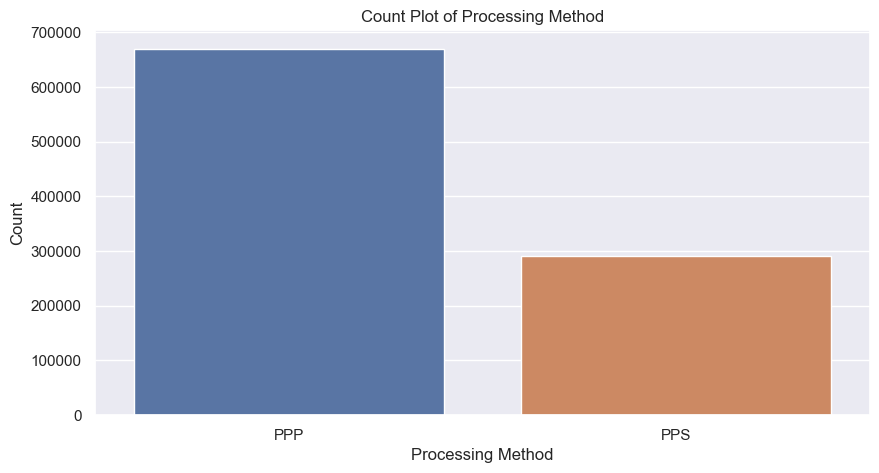

In [149]:
# create a countplot
sns.countplot(x='ProcessingMethod', data=df)

# set the axis labels and title
plt.xlabel('Processing Method')
plt.ylabel('Count')
plt.title('Count Plot of Processing Method')

# display the plot
plt.show()


### Visualizing the counts for Loan Status

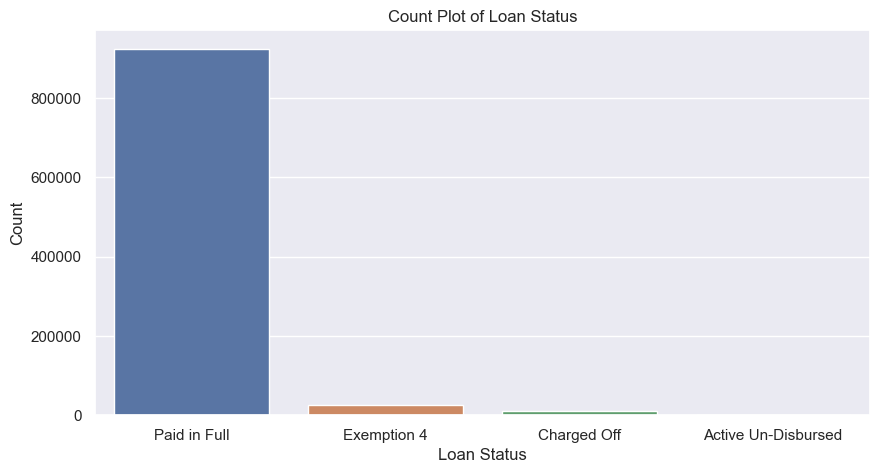

In [150]:
# create a countplot
sns.countplot(x='LoanStatus', data=df)

# set the axis labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count Plot of Loan Status')

# display the plot
plt.show()

Further qualitative analysis revealed that even forgiven loans and grants issued were recorded as "Paid in Full". 

### Plotting Box Outliers for Loan Statuses

<Axes: xlabel='LoanStatus', ylabel='CurrentApprovalAmount'>

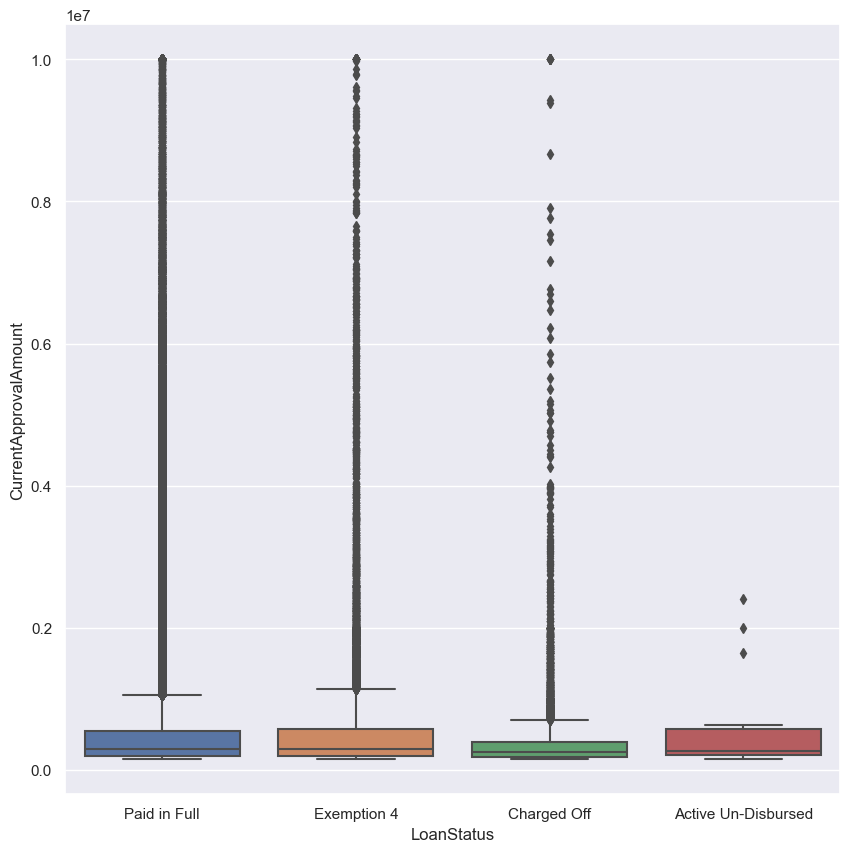

In [151]:
plt.figure(figsize=(10,10))
sns.boxplot(x='LoanStatus', y='CurrentApprovalAmount', data=df)

### Loan Applications by State

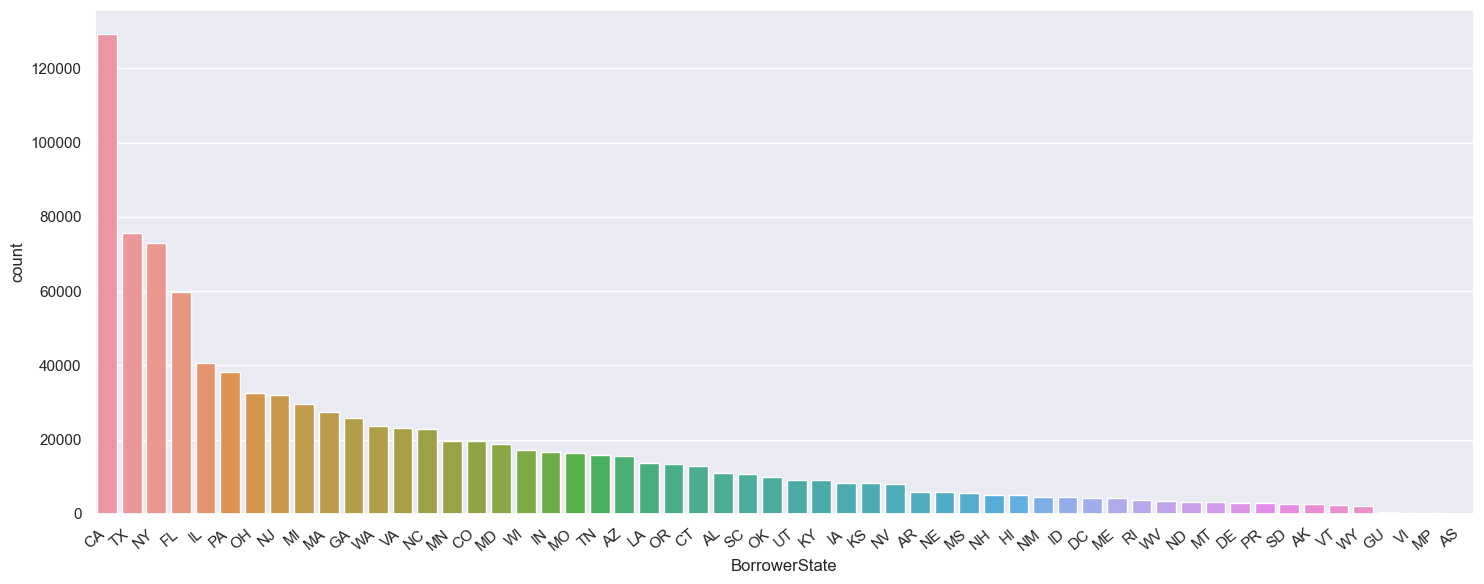

In [152]:
# create a countplot

plt.figure(figsize=(15,6))  #this creates an 8 inch wide, 4 inch high
ax=sns.countplot(x="BorrowerState", data=df, order=df['BorrowerState'].value_counts().iloc[:56].index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

### Now let us try and plot this on the map

In [153]:

# create a dictionary to map state abbreviations to full names
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}


# create a new column with full state names
df['state_name'] = df['BorrowerState'].map(state_dict)

# display the updated DataFrame
df.head()


/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/3189627533.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,loan_amount_per_employee,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,state_name
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,Unanswered,Unanswered,NaN,773553.37,2020-11-20,12409.012581,Paint and Coating Manufacturing,NaN,1000.000000,NaN
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,Male Owned,Non-Veteran,NaN,746336.24,2021-08-12,10094.901233,Landscaping Services,9.5,43.940301,NaN
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,Male Owned,Non-Veteran,NaN,395264.11,2021-09-10,23803.380952,New Single-family Housing Construction (Except...,45,31.364964,NaN
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,Unanswered,Unanswered,NaN,370819.35,2021-04-08,14697.480000,Used Household and Office Goods Moving,34,49.889728,NaN
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,2021-11-17,...,Unanswered,Unanswered,NaN,332137.41,2021-05-10,14947.272727,All Other Plastics Product Manufacturing,NaN,750.000000,NaN


In [154]:
# count the unique values in column_1
borrowerstatecounts = df['BorrowerState'].value_counts()

# create a new DataFrame with the counts
borrowerstatecounts_df = pd.DataFrame({'unique_values': borrowerstatecounts.index, 'count': borrowerstatecounts.values})

borrowerstatecounts_df['state_name'] = borrowerstatecounts_df['unique_values'].map(state_dict)

# display the new DataFrame
print(borrowerstatecounts_df)

   unique_values   count      state_name
0             CA  129265      California
1             TX   75729           Texas
2             NY   72941        New York
3             FL   59617         Florida
4             IL   40548        Illinois
5             PA   38296    Pennsylvania
6             OH   32434            Ohio
7             NJ   31934      New Jersey
8             MI   29608        Michigan
9             MA   27361   Massachusetts
10            GA   25726         Georgia
11            WA   23631      Washington
12            VA   23208        Virginia
13            NC   22763  North Carolina
14            MN   19696       Minnesota
15            CO   19637        Colorado
16            MD   18899        Maryland
17            WI   17313       Wisconsin
18            IN   16544         Indiana
19            MO   16303        Missouri
20            TN   15842       Tennessee
21            AZ   15668         Arizona
22            LA   13615       Louisiana
23            OR

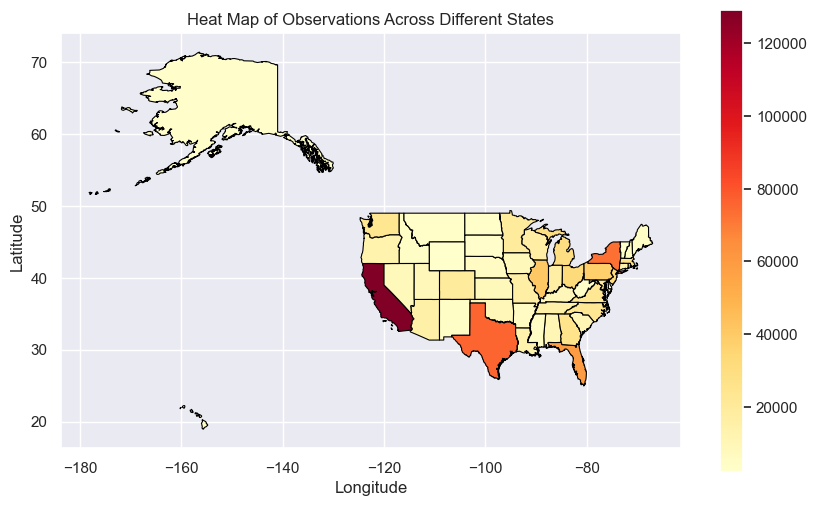

In [155]:
#graph showing loan applications per state across the United States
import geopandas as gpd

# load data from a csv file
#data = pd.read_csv('data.csv')

# load shapefile data of the USA
usa = gpd.read_file('/Users/aayush/Documents/Academics/Stevens/Semester 4/Advanced Data Analytics & Machine Learning/Project/Project Git Repo/ppp_loan_data/States 21basic/geo_export_f042980c-ca77-4dd6-bff4-38d915a31cce.shp')

# merge the data and shapefile data based on the state column
merged = usa.set_index('state_name').join(borrowerstatecounts_df.set_index('state_name'))

# create a choropleth map
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='count', cmap='YlOrRd', linewidth=0.8, edgecolor='black', ax=ax, legend=True)

# set the axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Heat Map of Observations Across Different States')

# display the plot
plt.show()

### Loan Applications by Type of Business

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.



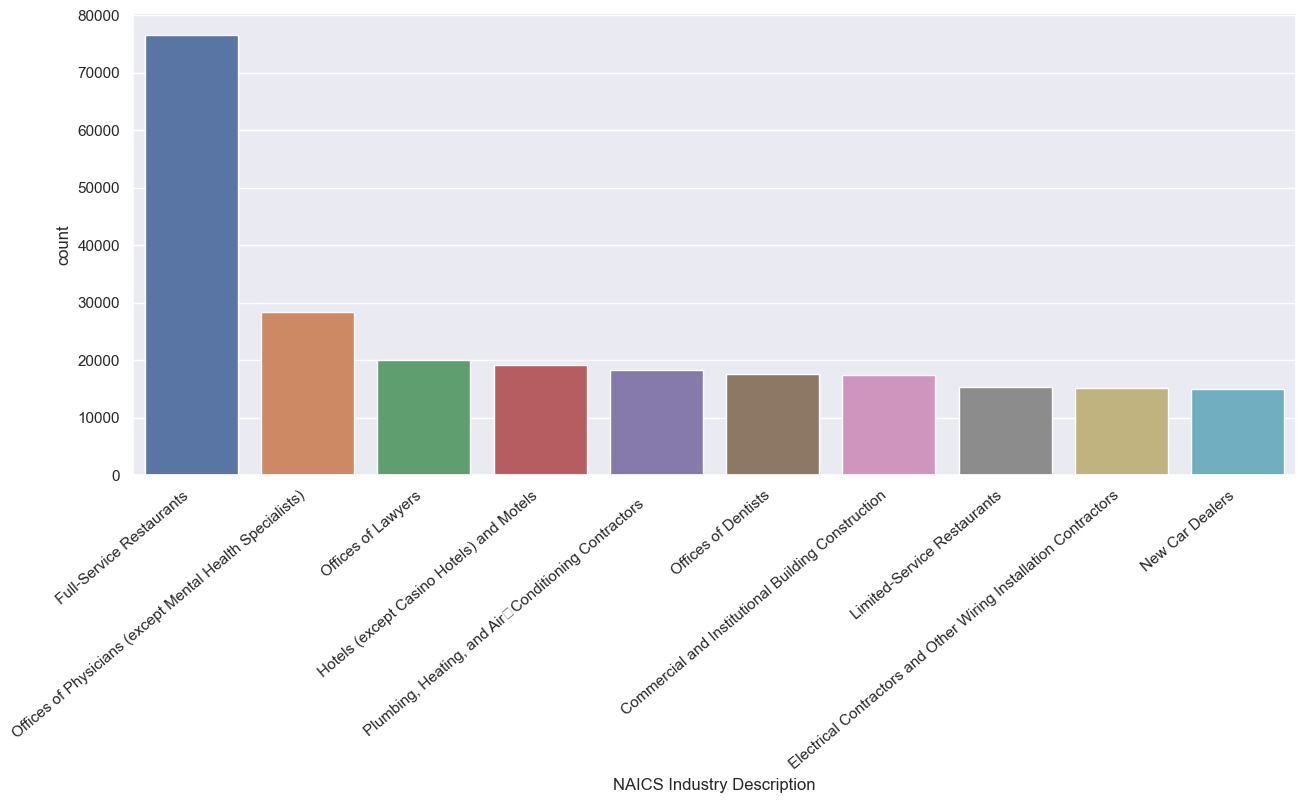

In [156]:
# loan application counts by industry
plt.figure(figsize=(15,6))  #this creates an 8 inch wide, 4 inch high

ax=sns.countplot(x="NAICS Industry Description", data=df,
                 order=df['NAICS Industry Description'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

### Loan Applications by Lender

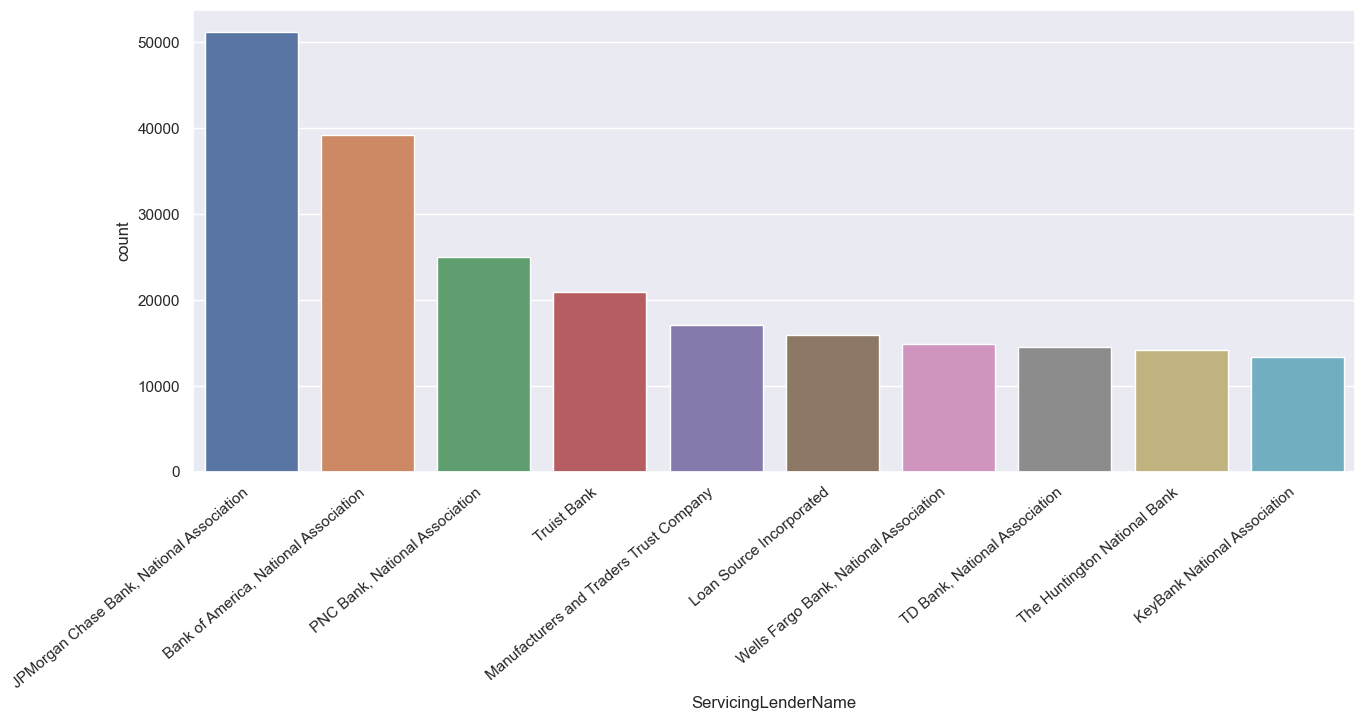

In [157]:
plt.figure(figsize=(15,6))  

ax=sns.countplot(x="ServicingLenderName", data=df,
                 order=df['ServicingLenderName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

# Calculating Application Risk Scores 


Calculating Application Risk Scores for each loan application by comparing its key attributes (Jobs Reported, Loan Amounts, and Loan Amounts per Employee) to other businesses of the same size in the same industry to rank extremely atypical loan applications.  


### Calculating Deviant Jobs Reported to see which applications are reporting jobs atypical of their industry type and firm size

In [158]:
df['Deviant Jobs Reported'] = np.abs(df['JobsReported'] - df['Size standards in number of employees']) / df['Size standards in number of employees']

# calculate the percentile rank of each observation in the 'Deviant Jobs Reported' column
df['Deviant JR Risk Score'] = df['Deviant Jobs Reported'].rank(pct=True, method='min')

df.head()

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/3475568661.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/3475568661.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,NonProfit,ForgivenessAmount,ForgivenessDate,loan_amount_per_employee,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,NaN,773553.37,2020-11-20,12409.012581,Paint and Coating Manufacturing,NaN,1000.000000,NaN,0.938000,0.834153
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,NaN,746336.24,2021-08-12,10094.901233,Landscaping Services,9.5,43.940301,NaN,0.661345,0.588651
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,NaN,395264.11,2021-09-10,23803.380952,New Single-family Housing Construction (Except...,45,31.364964,NaN,0.330463,0.235803
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,NaN,370819.35,2021-04-08,14697.480000,Used Household and Office Goods Moving,34,49.889728,NaN,0.498895,0.397746
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,2021-11-17,...,NaN,332137.41,2021-05-10,14947.272727,All Other Plastics Product Manufacturing,NaN,750.000000,NaN,0.970667,0.878925


### Calculating Deviant Loan Amounts to see which applications are requesting loans atypical of their industry type and firm size

In [159]:
# group by NAICSCode and calculate mean of CurrentApprovalAmount
grouped_mean = df.groupby('NAICSCode')['CurrentApprovalAmount'].transform('mean')

df['Deviant_CurrentApprovalAmount'] = np.abs(df['CurrentApprovalAmount'] - grouped_mean) / grouped_mean

# calculate the percentile rank of each observation in the 'Deviant_CurrentApprovalAmount' column
df['Deviant CAA Risk Score'] = df['Deviant_CurrentApprovalAmount'].rank(pct=True, method='min')

df.head()

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/1525821375.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/1525821375.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,ForgivenessDate,loan_amount_per_employee,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,2020-11-20,12409.012581,Paint and Coating Manufacturing,NaN,1000.000000,NaN,0.938000,0.834153,0.234017,0.177388
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,2021-08-12,10094.901233,Landscaping Services,9.5,43.940301,NaN,0.661345,0.588651,0.903115,0.893865
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,2021-09-10,23803.380952,New Single-family Housing Construction (Except...,45,31.364964,NaN,0.330463,0.235803,0.353556,0.290199
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,2021-04-08,14697.480000,Used Household and Office Goods Moving,34,49.889728,NaN,0.498895,0.397746,0.205325,0.153443
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,2021-11-17,...,2021-05-10,14947.272727,All Other Plastics Product Manufacturing,NaN,750.000000,NaN,0.970667,0.878925,0.526701,0.515330


### Calculating Deviant Loan Amount Per Employee to see which applications are showing Per-employee Loan Amounts atypical of their industry type and firm size

In [160]:
# group by NAICSCode and calculate mean of loan_amount_per_employee
grouped_mean_loan_amount_per_employee = df.groupby('NAICSCode')['loan_amount_per_employee'].transform('mean')

df['Deviant_loan_amount_per_employee'] = np.abs(df['loan_amount_per_employee'] - grouped_mean_loan_amount_per_employee) / grouped_mean_loan_amount_per_employee

# calculate the percentile rank of each observation in the 'Deviant_loan_amount_per_employee' column
df['Deviant LAPE Risk Score'] = df['Deviant_loan_amount_per_employee'].rank(pct=True, method='min')

df.head()

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/507173473.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/507173473.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,Paint and Coating Manufacturing,NaN,1000.000000,NaN,0.938000,0.834153,0.234017,0.177388,0.037012,0.079944
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,Landscaping Services,9.5,43.940301,NaN,0.661345,0.588651,0.903115,0.893865,0.009194,0.020202
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,New Single-family Housing Construction (Except...,45,31.364964,NaN,0.330463,0.235803,0.353556,0.290199,0.619216,0.890621
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,Used Household and Office Goods Moving,34,49.889728,NaN,0.498895,0.397746,0.205325,0.153443,0.494990,0.812613
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,2021-11-17,...,All Other Plastics Product Manufacturing,NaN,750.000000,NaN,0.970667,0.878925,0.526701,0.515330,0.357600,0.666266


### Calculating Total Average Risk Scores as a combination of all Risk Scores to retrieve overall loan applications atypical of their industry type and firm size

In [161]:
#Average Risk Score

df['Total Average Risk Score'] = df[['Deviant JR Risk Score', 'Deviant CAA Risk Score', 'Deviant LAPE Risk Score']].mean(axis=1)

df.head()

/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/2194753620.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Size standards \nin millions of dollars,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,2020-12-18,...,NaN,1000.000000,NaN,0.938000,0.834153,0.234017,0.177388,0.037012,0.079944,0.363828
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,2021-09-28,...,9.5,43.940301,NaN,0.661345,0.588651,0.903115,0.893865,0.009194,0.020202,0.500906
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,2021-10-16,...,45,31.364964,NaN,0.330463,0.235803,0.353556,0.290199,0.619216,0.890621,0.472207
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,2021-08-17,...,34,49.889728,NaN,0.498895,0.397746,0.205325,0.153443,0.494990,0.812613,0.454601
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,2021-11-17,...,NaN,750.000000,NaN,0.970667,0.878925,0.526701,0.515330,0.357600,0.666266,0.686840


# Possible Frauds based on Exporatory Analysis

In [162]:
# check null values for each column
null_counts = df.isnull().sum()

# Print the results
print('Null value counts by column:')
print(null_counts)

Null value counts by column:
LoanNumber                              0
DateApproved                            0
SBAOfficeCode                           0
ProcessingMethod                        0
BorrowerName                            4
                                    ...  
Deviant_CurrentApprovalAmount           0
Deviant CAA Risk Score                  0
Deviant_loan_amount_per_employee    17589
Deviant LAPE Risk Score             17589
Total Average Risk Score                0
Length: 65, dtype: int64


In [163]:
# Drop rows with null values in columns
df = df.dropna(subset=['BorrowerName','BorrowerAddress','BorrowerState','BorrowerCity','ProcessingMethod','NAICSCode'])

# Print the result
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Size standards \nin millions of dollars,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,19.5,42.058947,Alaska,8.153819,0.997413,16.762880,0.999534,0.555646,0.856126,0.951025
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,23.5,39.678603,Alaska,6.434737,0.993987,12.496137,0.998549,0.565417,0.862029,0.951522
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,NaN,1500.000000,Alaska,0.666667,0.594035,6.343754,0.992472,0.098908,0.211294,0.599267
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,15,98.885152,Alaska,4.056371,0.984487,10.571562,0.997604,1.043544,0.971858,0.984650
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,47,130.818534,Alaska,2.355794,0.963419,3.555585,0.979228,0.122057,0.258988,0.733878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,9,24.911970,Wyoming,0.397880,0.294099,0.459040,0.417376,0.220910,0.450612,0.387362
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,9.5,48.395810,Wyoming,0.132156,0.086688,0.505394,0.482813,0.498046,0.815117,0.461539
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,19,42.561206,Wyoming,0.882522,0.791644,0.754745,0.861398,0.862490,0.954519,0.869187
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,19,100.583408,Wyoming,0.930406,0.828010,0.733496,0.844564,1.780655,0.989810,0.887461


In [164]:
# check null values for each column
null_counts = df.isnull().sum()

# Print the results
print('Null value counts by column:')
print(null_counts)

Null value counts by column:
LoanNumber                              0
DateApproved                            0
SBAOfficeCode                           0
ProcessingMethod                        0
BorrowerName                            0
                                    ...  
Deviant_CurrentApprovalAmount           0
Deviant CAA Risk Score                  0
Deviant_loan_amount_per_employee    17589
Deviant LAPE Risk Score             17589
Total Average Risk Score                0
Length: 65, dtype: int64


## PPP loan eligibility criteria
   
    First draw PPP loans

    Your business was operational before February 15, 2020(startup done)
    You have no more than 500 employees(done)
    took loan from different lenders 
    Took loan within between those loans is every near
    
    Second draw PPP loans
    You have used up your first PPP loan
    Your business was operational before February 15, 2020
    You have no more than 300 employees (done)
    If your business has multiple locations, you have no more than 300 employees per location
    Check for spike in number of employees
    
    Not eligible for PPP loans due to size, type of business, or other criteria, applied for and received loans

In [165]:
df['BusinessAgeDescription'].unique()

array(['Existing or more than 2 years old', 'Unanswered',
       'New Business or 2 years or less', 'Change of Ownership',
       'Startup, Loan Funds will Open Business', nan], dtype=object)

In [166]:
# business is fraud id loan used to open new business
def Is_Fraud_business_start_date(BusinessAgeDescription):
    if BusinessAgeDescription == 'Startup, Loan Funds will Open Business':
        return 1
    else:
        return 0
df['Is_Fraud_business_start_date'] = df['BusinessAgeDescription'].apply(Is_Fraud_business_start_date)

# Print the updated DataFrame
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,42.058947,Alaska,8.153819,0.997413,16.762880,0.999534,0.555646,0.856126,0.951025,0
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,39.678603,Alaska,6.434737,0.993987,12.496137,0.998549,0.565417,0.862029,0.951522,0
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,1500.000000,Alaska,0.666667,0.594035,6.343754,0.992472,0.098908,0.211294,0.599267,0
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,98.885152,Alaska,4.056371,0.984487,10.571562,0.997604,1.043544,0.971858,0.984650,0
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,130.818534,Alaska,2.355794,0.963419,3.555585,0.979228,0.122057,0.258988,0.733878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,24.911970,Wyoming,0.397880,0.294099,0.459040,0.417376,0.220910,0.450612,0.387362,0
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,48.395810,Wyoming,0.132156,0.086688,0.505394,0.482813,0.498046,0.815117,0.461539,0
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,42.561206,Wyoming,0.882522,0.791644,0.754745,0.861398,0.862490,0.954519,0.869187,0
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,100.583408,Wyoming,0.930406,0.828010,0.733496,0.844564,1.780655,0.989810,0.887461,0


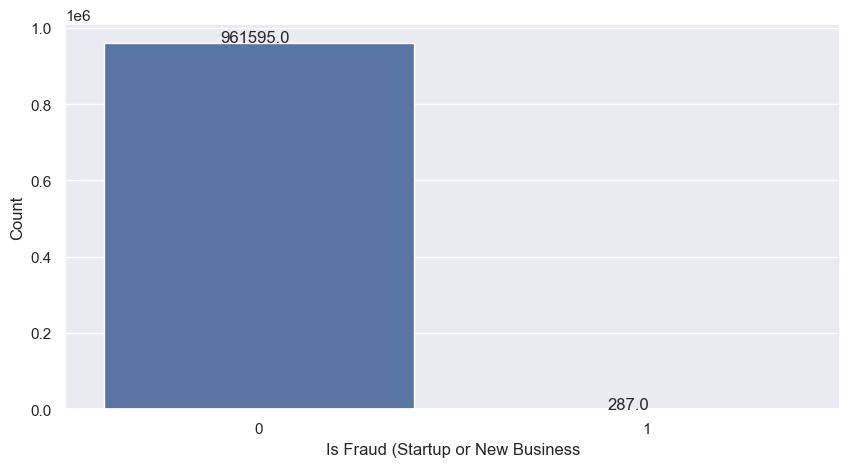

In [167]:
# Make a count plot to show the number of True and False values in the 'is_fraud_business_description' column
ax = sns.countplot(data=df, x='Is_Fraud_business_start_date')

# Label the axes
ax.set_xlabel('Is Fraud (Startup or New Business')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

In [168]:
# Use boolean indexing to filter the rows where 'is_fraud_business_description' column has value 1
filtered_df_startup = df[df['Is_Fraud_business_start_date'] == 1]

# Print the filtered DataFrame
filtered_df_startup

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date
13977,1580718209,2020-07-30,669,PPP,CLAY COUNTY ELECTRIC COOPERATIVE COOPERATION,3111 Highway 67,Corning,AR,72422,2021-04-20,...,1100.000000,Arkansas,0.940909,0.837780,0.127212,0.092190,0.030732,0.066647,0.332206,1
22677,3614747209,2020-04-27,988,PPP,SUNLAND SPRINGS MEMORY CARE LLC,2415 S SIGNAL BUTTE RD,Mesa,AZ,85209-2107,2021-04-27,...,74.239262,Arizona,0.656805,0.584157,0.292340,0.229597,0.253052,0.506954,0.440236,1
28070,8295587704,2020-05-01,988,PPP,SVAZ LLC,121 N. 6th St,Sierra Vista,AZ,85635,2021-04-23,...,58.765281,Arizona,0.557562,0.464518,0.176242,0.130010,0.125204,0.265357,0.286628,1
30361,2634907702,2020-05-01,988,PPP,FIREPIT HOLDINGS CORP DBA SERVPRO OF GI LBERT ...,45 N SUNWAY DR,GILBERT,AZ,85233,2021-02-18,...,69.140446,Arizona,0.667344,0.594934,0.708846,0.816296,0.354814,0.662541,0.691257,1
37722,4841347103,2020-04-13,912,PPP,ROOSTIFY INC.,180 Howard St Suite 100 Num 10,San Francisco,CA,94105,2020-10-20,...,34.563819,California,1.546015,0.942087,3.330708,0.976959,0.507487,0.822567,0.913871,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957934,8663017005,2020-04-08,563,PPP,"MAD CITY POWER SPORTS, INC.",4246 Daentl Road,Burke,WI,53532,2021-09-03,...,41.808483,Wisconsin,0.521628,0.423678,0.549990,0.551572,0.133251,0.281781,0.419011,1
958581,9290727007,2020-04-09,563,PPP,"PORTAGE COLD STORAGE, INC.",110 E Oneida St,Portage,WI,53901-1753,2021-09-03,...,54.951220,Wisconsin,0.363071,0.263221,0.645039,0.714159,0.481736,0.801541,0.592974,1
958931,1040697110,2020-04-09,563,PPP,CRR FRANCHISING INC,1733 East Main Street,Reedsburg,WI,53959-1404,NaT,...,46.225619,Wisconsin,0.567339,0.476563,0.502075,0.477885,0.251797,0.504872,0.486440,1
958932,1281487107,2020-04-10,563,PPP,UNIFIED COLD STORAGE LLC,4211 Observatory Road,Cross Plains,WI,53528-8854,2021-02-09,...,31.364964,Wisconsin,0.553642,0.460901,0.462229,0.421917,0.035022,0.075774,0.319531,1


In [169]:
# Check for number of jobs reported based on 500 employees for First Round PPP and Second Round PPS
max_income = df['JobsReported'].max()
min_income = df['JobsReported'].min()

# Print the results
print(f"The maximum JobsReported is {max_income}.")
print(f"The minimum JobsReported is {min_income}.")

zero_JobsReported_df = df[df['JobsReported'] == 0]

# Print the filtered DataFrame
zero_JobsReported_df

The maximum JobsReported is 500.0.
The minimum JobsReported is 0.0.


,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Size standards in number of employees,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date
123809,6557167306,2020-04-30,914,PPP,ST. MARGARET MARY SCHOOL,25515 ESHELMAN,LOMITA,CA,90717,2021-10-21,...,72.517193,California,1.0,0.915653,0.665465,0.748062,NaN,NaN,0.831857,0
550930,5780187005,2020-04-06,766,PPP,"RELIANT TRANSPORTATION, INC.",4411 S 86th Street,Lincoln,NE,68526-9225,2021-03-11,...,43.190888,Nebraska,1.0,0.915653,0.141607,0.103170,NaN,NaN,0.509412,0
763779,4864227203,2020-04-27,303,PPP,VINCERA REHAB LLC,"1200 Constitution Ave, Ste 210",Philadelphia,PA,19112-1306,2021-04-14,...,88.087571,Pennsylvania,1.0,0.915653,0.784274,0.875006,NaN,NaN,0.895329,0
967205,4563247009,2020-04-03,897,PPP,WEEDEN CONSTRUCTION LLC,402 MURPHY GULCH RD,BANNER,WY,82832-9726,2020-12-15,...,55.028995,Wyoming,1.0,0.915653,0.547110,0.547101,NaN,NaN,0.731377,0


In [170]:
# business is fraud id if jobs reoprted as 0, hence updated fraud columns for those
df.loc[df['JobsReported'] == 0, 'Is_Fraud_JobsReported'] = 1
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,Alaska,8.153819,0.997413,16.762880,0.999534,0.555646,0.856126,0.951025,0,NaN
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,Alaska,6.434737,0.993987,12.496137,0.998549,0.565417,0.862029,0.951522,0,NaN
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,Alaska,0.666667,0.594035,6.343754,0.992472,0.098908,0.211294,0.599267,0,NaN
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,Alaska,4.056371,0.984487,10.571562,0.997604,1.043544,0.971858,0.984650,0,NaN
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,Alaska,2.355794,0.963419,3.555585,0.979228,0.122057,0.258988,0.733878,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,Wyoming,0.397880,0.294099,0.459040,0.417376,0.220910,0.450612,0.387362,0,NaN
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,Wyoming,0.132156,0.086688,0.505394,0.482813,0.498046,0.815117,0.461539,0,NaN
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,Wyoming,0.882522,0.791644,0.754745,0.861398,0.862490,0.954519,0.869187,0,NaN
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,Wyoming,0.930406,0.828010,0.733496,0.844564,1.780655,0.989810,0.887461,0,NaN


In [171]:
#mark rows as fraud based on jobs reported, if jobs> 300 in PPS, its a fraud

# Select the rows where loan processing method is 'PPS' and jobs reported is greater than 300
df_filtered2=df.loc[(df['ProcessingMethod'] == 'PPS') & (df['JobsReported'] > 300)]
df_filtered2

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported
19943,3363518505,2021-02-23,988,PPS,KIND HOSPITALITY INC.,1225 N Gilbert Rd,Mesa,AZ,85203-4501,2022-02-18,...,Arizona,8.097421,0.996800,4.189598,0.984041,0.545097,0.849243,0.943361,0,NaN
19955,4715638505,2021-02-26,988,PPS,SOUTHWEST PIZZA INC.,5925 E Broadway Blvd Ste 125,Tucson,AZ,85711-3903,2021-10-16,...,Arizona,5.186247,0.990548,4.189598,0.984041,0.331025,0.629729,0.868106,0,NaN
20874,2677328908,2021-04-27,988,PPS,YAWBUS INC,8674 E San Alberto,Scottsdale,AZ,85258-4306,2021-12-21,...,Arizona,2.323166,0.962751,0.934881,0.896582,0.555387,0.855971,0.905101,0,NaN
24010,1344808907,2021-04-24,988,PPS,ARIZONA SUBWAY DEVELOPMENT CORP,8674 E San Alberto,Scottsdale,AZ,85258-4306,2021-12-21,...,Arizona,2.520973,0.966376,0.188116,0.139358,0.823920,0.948970,0.684901,0,NaN
24118,4024268709,2021-03-31,988,PPS,FIRST CUP PARTNERS LAS VEGAS LLC,106 S Kyrene Rd Ste 2,Chandler,AZ,85226-4692,NaT,...,Arizona,3.104505,0.974673,0.203958,0.152346,0.851900,0.953043,0.693354,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922837,9323328608,2021-03-25,1013,PPS,GRAND CENTRAL BAKERY INC,21 S Nevada St,Seattle,WA,98134-1121,2021-04-10,...,Washington,2.392398,0.964146,2.480001,0.963054,0.216657,0.442746,0.789982,0,NaN
946294,1252898610,2021-03-13,563,PPS,DECADE PROPERTIES INC,13555 Bishops Ct Ste 345,Brookfield,WI,53005-6218,2022-10-11,...,Wisconsin,4.012926,0.984214,2.623804,0.966122,0.393626,0.711490,0.887275,0,NaN
946301,1865908505,2021-02-19,563,PPS,THE LOWLANDS GROUP LLC,1421 N Water St,Milwaukee,WI,53202-2586,2022-05-14,...,Wisconsin,4.531232,0.987437,4.189598,0.984041,0.251804,0.504886,0.825455,0,NaN
946386,9534238605,2021-03-26,563,PPS,NORTH CENTRAL STAFFING INC.,1600 Aspen Cmns Ste 200,Middleton,WI,53562-4770,2022-01-20,...,Wisconsin,7.085365,0.995195,2.623804,0.966122,0.624048,0.892933,0.951417,0,NaN


In [172]:
# business is fraud id if jobs reoprted are greater than 300 in PPS round, hence updated fraud columns for those

df.loc[(df['ProcessingMethod'] == 'PPS') & (df['JobsReported'] > 300), 'Is_Fraud_JobsReported'] = 1
df.loc[(df['ProcessingMethod'] == 'PPS') & (df['JobsReported'] <= 300), 'Is_Fraud_JobsReported'] = 0
df.loc[df['LoanNumber'] == 9323328608]
df['Is_Fraud_JobsReported'] = df['Is_Fraud_JobsReported'].fillna(0).replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)


In [173]:
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,Alaska,8.153819,0.997413,16.762880,0.999534,0.555646,0.856126,0.951025,0,0
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,Alaska,6.434737,0.993987,12.496137,0.998549,0.565417,0.862029,0.951522,0,0
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,Alaska,0.666667,0.594035,6.343754,0.992472,0.098908,0.211294,0.599267,0,0
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,Alaska,4.056371,0.984487,10.571562,0.997604,1.043544,0.971858,0.984650,0,0
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,Alaska,2.355794,0.963419,3.555585,0.979228,0.122057,0.258988,0.733878,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,Wyoming,0.397880,0.294099,0.459040,0.417376,0.220910,0.450612,0.387362,0,0
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,Wyoming,0.132156,0.086688,0.505394,0.482813,0.498046,0.815117,0.461539,0,0
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,Wyoming,0.882522,0.791644,0.754745,0.861398,0.862490,0.954519,0.869187,0,0
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,Wyoming,0.930406,0.828010,0.733496,0.844564,1.780655,0.989810,0.887461,0,0


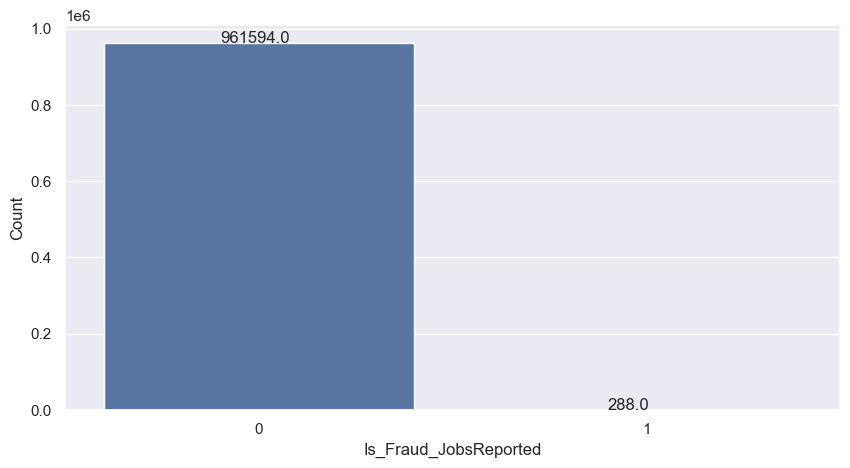

In [174]:
# Make a count plot to show the number of True and False values in the 'Is_Fraud_JobsReported' column
ax = sns.countplot(data=df, x='Is_Fraud_JobsReported')

# Label the axes
ax.set_xlabel('Is_Fraud_JobsReported')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

In [175]:
# Find duplicate values based on business name ,processing method and locations
duplicates = df[df.duplicated(['BorrowerName','BorrowerAddress','BorrowerState','BorrowerCity','ProcessingMethod'], keep=False)]
if not duplicates.empty:
    print('Duplicate values found:')
    #print(duplicates)
else:
    print('No duplicate values found.')

Duplicate values found:


In [176]:
duplicates

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported
4667,7959257001,2020-04-08,459,PPP,CREEK INDIAN ENTERPRISES DEVELOPMENT AUTHORITY,100 BROOKWOOD RD,ATMORE,AL,36502-3513,2022-02-17,...,Alabama,0.463123,0.360844,0.625158,0.681301,0.122641,0.260129,0.434091,0,0
8600,5710377106,2020-04-13,459,PPP,CREEK INDIAN ENTERPRISES DEVELOPMENT AUTHORITY,100 BROOKWOOD RD,ATMORE,AL,36502-3513,2022-02-17,...,Alabama,0.372965,0.273150,0.424150,0.371474,0.243163,0.489889,0.378171,0,0
9721,4470468405,2021-02-06,459,PPS,KEEP INFORMATION TECHNOLOGY SIMPLE LLC,1900 2nd Ave N Ste 200,Birmingham,AL,35203-3620,NaT,...,Alabama,0.413015,0.309541,0.626396,0.683297,0.430534,0.752661,0.581833,0,0
10382,6359988910,2021-05-01,459,PPS,KEEP INFORMATION TECHNOLOGY SIMPLE LLC,1900 2nd Ave N Ste 200,Birmingham,AL,35203-3620,2022-12-20,...,Alabama,0.413015,0.309541,0.654539,0.729831,0.473432,0.794258,0.611210,0,0
19635,9773187201,2020-04-28,988,PPP,"FITNESS ALLIANCE, LLC",1 E Washington Street #250,Phoenix,AZ,85004,2021-08-17,...,Arizona,4.700254,0.988265,7.006211,0.993810,0.078945,0.169606,0.717227,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937766,1002737206,2020-04-15,1013,PPP,"WILDFIN NORTHWEST, LLC",835 NW GILMAN BLVD,ISSAQUAH,WA,98027,2021-07-08,...,Washington,0.909026,0.809678,0.419868,0.366134,4.085241,0.997090,0.724301,0,0
951900,5267107209,2020-04-27,563,PPP,"EXQUISITE THREADING, LLC",2727 N Mayfair Rd Ste C,Wauwatosa,WI,53222-4400,2021-08-21,...,Wisconsin,0.799202,0.731011,0.221661,0.166959,0.468657,0.789967,0.562646,0,0
952372,2214287710,2020-05-01,563,PPP,"EXQUISITE THREADING, LLC",2727 N Mayfair Rd Ste C,Wauwatosa,WI,53222,NaT,...,Wisconsin,1.627014,0.944912,0.550736,0.552794,0.614813,0.888486,0.795397,0,0
955569,5028227006,2020-04-04,563,PPP,LARSON OAKWOOD BUSINESS PARK LLC,3502 Oakwood Mall DR,EAU CLAIRE,WI,54701-2607,2021-04-17,...,Wisconsin,0.628073,0.549184,0.519846,0.504797,0.082905,0.177872,0.410618,0,0


In [177]:
#Fraud loan example with loans taken for same business twice in First round PPP with different jobs reported

df[df['BorrowerName'] == 'LARSON OAKWOOD BUSINESS PARK LLC']['JobsReported']

955569    23.0
962384    14.0
Name: JobsReported, dtype: float64

In [178]:
#Fraud loan examples with loans taken by a business within same week from different lenders and NAICS reported


duplicates.loc[df['BorrowerName'] == 'EXQUISITE THREADING, LLC']

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,state_name,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported
951900,5267107209,2020-04-27,563,PPP,"EXQUISITE THREADING, LLC",2727 N Mayfair Rd Ste C,Wauwatosa,WI,53222-4400,2021-08-21,...,Wisconsin,0.799202,0.731011,0.221661,0.166959,0.468657,0.789967,0.562646,0,0
952372,2214287710,2020-05-01,563,PPP,"EXQUISITE THREADING, LLC",2727 N Mayfair Rd Ste C,Wauwatosa,WI,53222,NaT,...,Wisconsin,1.627014,0.944912,0.550736,0.552794,0.614813,0.888486,0.795397,0,0


In [179]:
df[df['BorrowerName'] == 'EXQUISITE THREADING, LLC']['OriginatingLender']


951900                        The Bippus State Bank
952372    JPMorgan Chase Bank, National Association
Name: OriginatingLender, dtype: object

In [180]:
df[df['BorrowerName'] == 'EXQUISITE THREADING, LLC']['NAICSCode']

951900    812112
952372    812113
Name: NAICSCode, dtype: object

In [181]:
#identifying duplicated businesses and flagging them as Is_Fraud_duplicated
df['is_Fraud_duplicate'] = ((df.duplicated(subset=['BorrowerName', 'BorrowerAddress', 'BorrowerState', 'BorrowerCity', 'ProcessingMethod'],
                                           keep=False))).astype(int)


In [182]:
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Deviant Jobs Reported,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported,is_Fraud_duplicate
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,8.153819,0.997413,16.762880,0.999534,0.555646,0.856126,0.951025,0,0,0
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,6.434737,0.993987,12.496137,0.998549,0.565417,0.862029,0.951522,0,0,0
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,0.666667,0.594035,6.343754,0.992472,0.098908,0.211294,0.599267,0,0,0
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,4.056371,0.984487,10.571562,0.997604,1.043544,0.971858,0.984650,0,0,0
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,2.355794,0.963419,3.555585,0.979228,0.122057,0.258988,0.733878,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,0.397880,0.294099,0.459040,0.417376,0.220910,0.450612,0.387362,0,0,0
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,0.132156,0.086688,0.505394,0.482813,0.498046,0.815117,0.461539,0,0,0
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,0.882522,0.791644,0.754745,0.861398,0.862490,0.954519,0.869187,0,0,0
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,0.930406,0.828010,0.733496,0.844564,1.780655,0.989810,0.887461,0,0,0


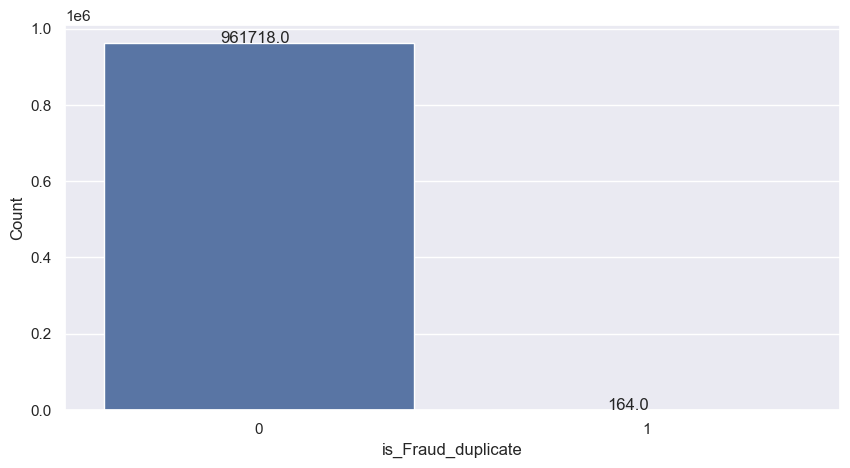

In [183]:
# Make a count plot to show the number of True and False values in the 'is_Fraud_duplicate' column
ax = sns.countplot(data=df, x='is_Fraud_duplicate')

# Label the axes
ax.set_xlabel('is_Fraud_duplicate')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

In [184]:
#introducing threshold for risk score in top 10 percentifile as probable fraud
threshold_risk = df['Total Average Risk Score'].quantile(0.90)

# create a new column and set the value to "fraud" if the condition is true
df['Is_Fraud_risk_avg'] = [1 if x > threshold_risk else 0 for x in df['Total Average Risk Score']]
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Deviant JR Risk Score,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported,is_Fraud_duplicate,Is_Fraud_risk_avg
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,0.997413,16.762880,0.999534,0.555646,0.856126,0.951025,0,0,0,1
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,0.993987,12.496137,0.998549,0.565417,0.862029,0.951522,0,0,0,1
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,0.594035,6.343754,0.992472,0.098908,0.211294,0.599267,0,0,0,0
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,0.984487,10.571562,0.997604,1.043544,0.971858,0.984650,0,0,0,1
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,0.963419,3.555585,0.979228,0.122057,0.258988,0.733878,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,0.294099,0.459040,0.417376,0.220910,0.450612,0.387362,0,0,0,0
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,0.086688,0.505394,0.482813,0.498046,0.815117,0.461539,0,0,0,0
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,0.791644,0.754745,0.861398,0.862490,0.954519,0.869187,0,0,0,1
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,0.828010,0.733496,0.844564,1.780655,0.989810,0.887461,0,0,0,1


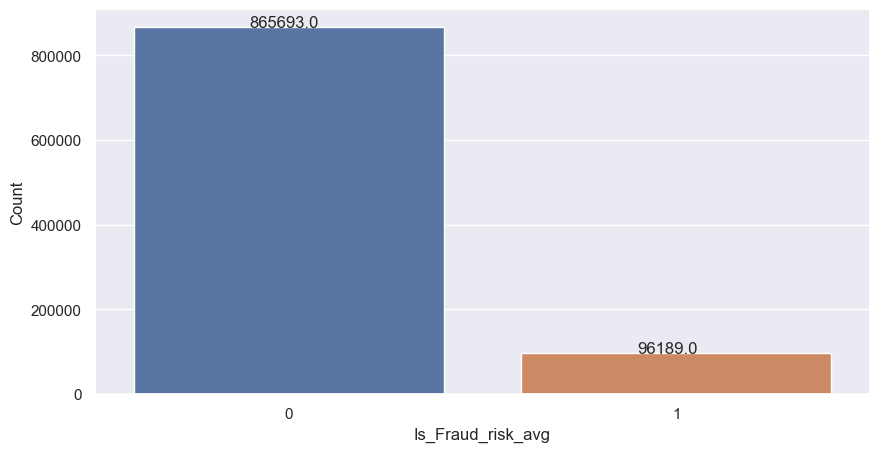

In [185]:
# Make a count plot to show the frauds based on average risk score
ax = sns.countplot(data=df, x='Is_Fraud_risk_avg')

# Label the axes
ax.set_xlabel('Is_Fraud_risk_avg')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

In [186]:
#Accumulate all fraud cases together
Is_Fraud = df[['Is_Fraud_risk_avg', 'Is_Fraud_business_start_date', 'Is_Fraud_JobsReported', 'is_Fraud_duplicate']].any(axis=1)

# introduce new column 'Is_Fraud' with value 1 if any of the four columns have a value of 1
df['Is_Fraud'] = Is_Fraud.astype(int)
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Deviant_CurrentApprovalAmount,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported,is_Fraud_duplicate,Is_Fraud_risk_avg,Is_Fraud
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,2021-07-22,...,16.762880,0.999534,0.555646,0.856126,0.951025,0,0,0,1,1
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,2021-08-21,...,12.496137,0.998549,0.565417,0.862029,0.951522,0,0,0,1,1
15,4539098204,2020-08-06,1084,PPP,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502-1130,NaT,...,6.343754,0.992472,0.098908,0.211294,0.599267,0,0,0,0,0
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,2022-10-06,...,10.571562,0.997604,1.043544,0.971858,0.984650,0,0,0,1,1
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,2021-06-09,...,3.555585,0.979228,0.122057,0.258988,0.733878,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968526,4395967002,2020-04-03,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,2021-01-13,...,0.459040,0.417376,0.220910,0.450612,0.387362,0,0,0,0,0
968527,6985647108,2020-04-14,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,2020-12-08,...,0.505394,0.482813,0.498046,0.815117,0.461539,0,0,0,0,0
968528,7996438405,2021-02-12,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,2021-09-15,...,0.754745,0.861398,0.862490,0.954519,0.869187,0,0,0,1,1
968529,9054647103,2020-04-15,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,2022-03-08,...,0.733496,0.844564,1.780655,0.989810,0.887461,0,0,0,1,1


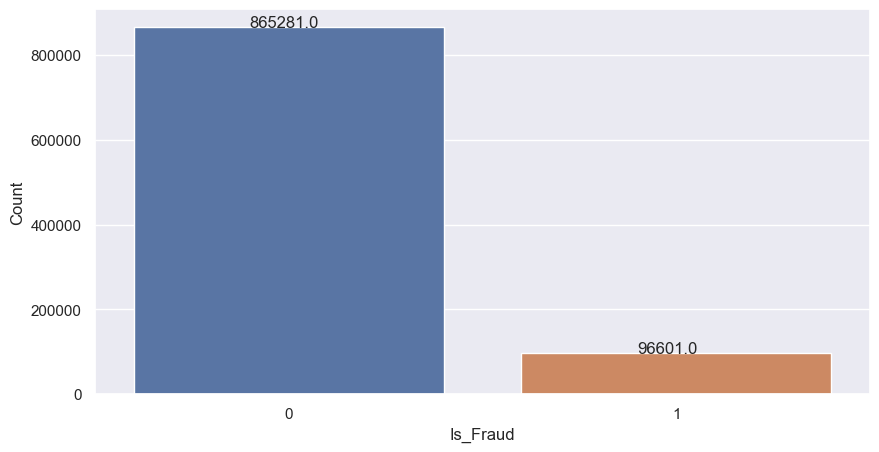

In [187]:
# Make a count plot to show the frauds identified in the entire dataset
ax = sns.countplot(data=df, x='Is_Fraud')

# Label the axes
ax.set_xlabel('Is_Fraud')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

In [188]:
# create a dictionary to map state abbreviations to full names
state_dict = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}


# create a new column with full state names
df['state_name'] = df['BorrowerState'].map(state_dict)

In [189]:
#frauds density state wise

fraud_count = df.groupby('BorrowerState')['Is_Fraud'].sum().reset_index()
fraud_count['BorrowerState'] = fraud_count['BorrowerState'].astype(str)
import plotly.express as px

fig = px.choropleth(fraud_count, locations='BorrowerState',
                    locationmode="USA-states", color='Is_Fraud', scope="usa")
fig.update_layout(title='State-wise Fraud Counts in the USA')
fig.show()

# Anomaly Detection using Isolation Forest

In [190]:
num_missing = df[['PAYROLL_PROCEED', 'JobsReported','CurrentApprovalAmount', 'BorrowerName',
                   'BorrowerAddress', 'BorrowerCity', 'BorrowerState', 'OriginatingLender', 'NAICSCode']].isnull().sum(axis=0)

print(f"Total number of rows with missing values: {num_missing}")

#df[['PAYROLL_PROCEED', 'JobsReported','InitialApprovalAmount']]

Total number of rows with missing values: PAYROLL_PROCEED          1820
JobsReported                1
CurrentApprovalAmount       0
BorrowerName                0
BorrowerAddress             0
BorrowerCity                0
BorrowerState               0
OriginatingLender           0
NAICSCode                   0
dtype: int64


In [191]:
df = df.dropna(subset=['PAYROLL_PROCEED', 'JobsReported'])

num_missing = df[['PAYROLL_PROCEED', 'JobsReported','CurrentApprovalAmount', 'BorrowerName',
                   'BorrowerAddress', 'BorrowerCity', 'BorrowerState', 'OriginatingLender', 'NAICSCode']].isnull().sum(axis=0)


print(f"Total number of rows with missing values: {num_missing}")


Total number of rows with missing values: PAYROLL_PROCEED          0
JobsReported             0
CurrentApprovalAmount    0
BorrowerName             0
BorrowerAddress          0
BorrowerCity             0
BorrowerState            0
OriginatingLender        0
NAICSCode                0
dtype: int64


In [192]:
LAPE_nan_count = df['loan_amount_per_employee'].isna().sum()
print(LAPE_nan_count)


0


In [193]:
df['loan_amount_per_employee'] = df['loan_amount_per_employee'].replace([np.inf, -np.inf], np.nan)


/var/folders/kv/6lbdnx3x1bd64ntgq948lmj00000gn/T/ipykernel_17777/2005413637.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
LAPE_nan_count = df['loan_amount_per_employee'].isna().sum()
print(LAPE_nan_count)


4


In [195]:
df = df.dropna(subset=['loan_amount_per_employee'])
LAPE_nan_count = df['loan_amount_per_employee'].isna().sum()
print(LAPE_nan_count)

0


In [196]:
TARS_nan_count = df['Total Average Risk Score'].isna().sum()
print(TARS_nan_count)

0


In [197]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Scale the features to have zero mean and unit variance
X = df[['PAYROLL_PROCEED', 'JobsReported', 'InitialApprovalAmount', 'loan_amount_per_employee', 'Total Average Risk Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest model
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)

# Fit the model to the data
clf.fit(X_scaled)

# Predict the anomaly scores for each data point
scores = clf.decision_function(X_scaled)

# Add the anomaly scores as a new column in your dataframe
df['anomaly_score'] = scores

# Sort the dataframe by anomaly score in descending order
df = df.sort_values(by='anomaly_score', ascending=False)

# Print the rows with the highest anomaly scores, which could potentially indicate PPP loan fraud
df.head(10)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Deviant CAA Risk Score,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported,is_Fraud_duplicate,Is_Fraud_risk_avg,Is_Fraud,anomaly_score
858306,7496047207,2020-04-28,610,PPP,"GENESIS RESOURCES, LLC",2435 North Central Expressway,Richardson,TX,75080,2021-06-10,...,0.517636,0.260215,0.519049,0.492896,0,0,0,0,0,0.349319
581363,9655287108,2020-04-15,299,PPP,KAM MAN SUPERMARKET LLC,200 STATE ROUTE 10,EAST HANOVER,NJ,07936,2021-09-29,...,0.573903,0.042300,0.091334,0.493526,0,0,0,0,0,0.349319
779878,1577258408,2021-02-02,165,PPS,CHURCHILL & BANKS COMPANIES LLC,10 Greene St,Providence,RI,02903-3232,2022-03-11,...,0.491072,0.319820,0.613546,0.487673,0,0,0,0,0,0.349272
858108,8753077408,2020-05-19,671,PPP,"COASTWIDE MARINE SERVICES, LLC",16303 Avenue D,Channelview,TX,77530,2021-08-11,...,0.575845,0.251003,0.503485,0.490721,0,0,0,0,0,0.349272
779879,5855487007,2020-04-06,165,PPP,CHURCHILL & BANKS COMPANIES LLC,10 GREENE ST,PROVIDENCE,RI,02903-3232,2021-06-24,...,0.491135,0.319877,0.613630,0.487722,0,0,0,0,0,0.349272
804514,6250327203,2020-04-27,474,PPP,FIRST CHOICE SERVICES INC.,4135 Cromwell Rd,Chattanooga,TN,37421,2021-02-24,...,0.570322,0.274750,0.543286,0.488743,0,0,0,0,0,0.349272
177855,9934747107,2020-04-15,811,PPP,"JACK'S BEAN COMPANY, LLC",402 N INTEROCEAN AVE,HOLYOKE,CO,80734-1000,2020-12-04,...,0.578839,0.193881,0.400693,0.489839,0,0,0,0,0,0.349272
700781,8234128306,2021-01-29,549,PPS,MCMAHON MASONRY RESTORATION LTD MCMAHON MASONR...,9449 Brookpark Rd Ste A,Parma,OH,44129-6838,2021-11-20,...,0.568446,0.231844,0.470246,0.484780,0,0,0,0,0,0.349272
508836,5878107001,2020-04-06,768,PPP,"I & I, INC.",5105 BROWN AVE,SAINT LOUIS,MO,63115-1202,2021-01-14,...,0.590852,0.039172,0.084533,0.491679,0,0,0,0,0,0.349272
804445,1554467108,2020-04-10,474,PPP,EMB QUALITY MASONRY,2657 Appling Road Suite 202,MEMPHIS,TN,38133-5001,2021-12-14,...,0.565158,0.228443,0.464192,0.481665,0,0,0,0,0,0.349004


In [198]:
# Get split values of the individual trees
tree_split_values = np.zeros((X.shape[1], clf.n_estimators))
for i, tree in enumerate(clf.estimators_):
    for j in range(X.shape[1]):
        tree_split_values[j, i] = tree.tree_.threshold[j]

# Calculate feature importance based on split values
feat_importance = np.mean(tree_split_values, axis=1)

# Print feature importances in descending order
for i in np.argsort(feat_importance)[::-1]:
    print(f"{X.columns[i]}: {feat_importance[i]}")

PAYROLL_PROCEED: 2.651886161705919
JobsReported: 1.0553154151301845
InitialApprovalAmount: 0.301919596242056
loan_amount_per_employee: -0.0261636964201355
Total Average Risk Score: -0.13883244503281827


In [199]:
# calculate the 95th percentile value
threshold = df['anomaly_score'].quantile(0.90)

# create a new column and set the value to "fraud" if the condition is true
df['Is_Fraud_Anomaly'] = [1 if x > threshold else 0 for x in df['anomaly_score']]
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported,is_Fraud_duplicate,Is_Fraud_risk_avg,Is_Fraud,anomaly_score,Is_Fraud_Anomaly
858306,7496047207,2020-04-28,610,PPP,"GENESIS RESOURCES, LLC",2435 North Central Expressway,Richardson,TX,75080,2021-06-10,...,0.260215,0.519049,0.492896,0,0,0,0,0,0.349319,1
581363,9655287108,2020-04-15,299,PPP,KAM MAN SUPERMARKET LLC,200 STATE ROUTE 10,EAST HANOVER,NJ,07936,2021-09-29,...,0.042300,0.091334,0.493526,0,0,0,0,0,0.349319,1
779878,1577258408,2021-02-02,165,PPS,CHURCHILL & BANKS COMPANIES LLC,10 Greene St,Providence,RI,02903-3232,2022-03-11,...,0.319820,0.613546,0.487673,0,0,0,0,0,0.349272,1
858108,8753077408,2020-05-19,671,PPP,"COASTWIDE MARINE SERVICES, LLC",16303 Avenue D,Channelview,TX,77530,2021-08-11,...,0.251003,0.503485,0.490721,0,0,0,0,0,0.349272,1
779879,5855487007,2020-04-06,165,PPP,CHURCHILL & BANKS COMPANIES LLC,10 GREENE ST,PROVIDENCE,RI,02903-3232,2021-06-24,...,0.319877,0.613630,0.487722,0,0,0,0,0,0.349272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810634,4688397001,2020-04-04,678,PPP,VENABLE'S WELDING & ROUSTABOUT,7410 CONTINENTAL PKWY,AMARILLO,TX,79119-6740,2022-02-10,...,1.909198,0.991042,0.994154,0,0,0,1,1,-0.095160,0
560561,8015747003,2020-04-08,299,PPP,APPLE FOOD SERVICE OF NEW JERSEY LLC,7 PEARL CT,ALLENDALE,NJ,07401-1610,2021-07-23,...,49.898428,0.999904,0.899547,0,0,0,1,1,-0.095160,0
2675,1517597200,2020-04-15,459,PPP,ACTION ENTERPRISE HOLDINGS LLC,204 20TH ST N,BIRMINGHAM,AL,35203-3610,2021-08-05,...,NaN,NaN,0.999396,0,0,0,1,1,-0.095160,0
605898,7569987307,2020-04-30,202,PPP,COUNTY AGENCY INC.,129 S 8th St,Brooklyn,NY,11211-6119,NaT,...,28.378180,0.999788,0.901129,0,0,0,1,1,-0.096776,0


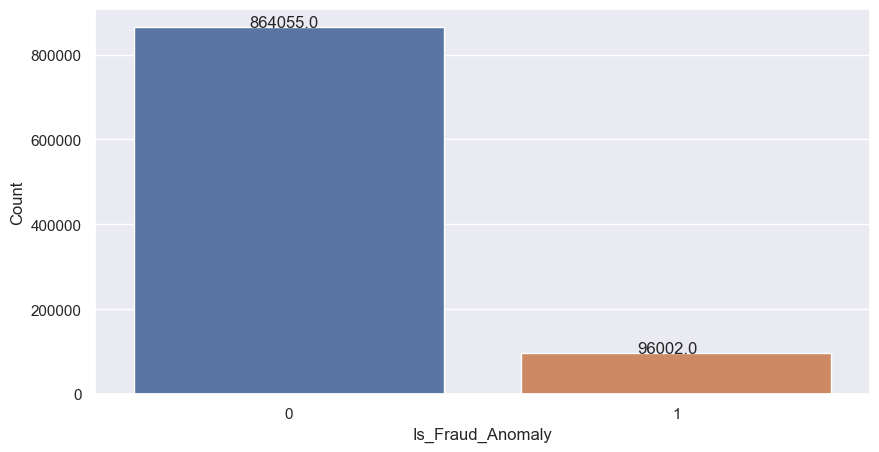

In [200]:
#Countplot of Frauds vs Non-Frauds based on isolation forest
ax = sns.countplot(data=df, x='Is_Fraud_Anomaly')

# Label the axes
ax.set_xlabel('Is_Fraud_Anomaly')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

In [201]:
fraud_count = df.groupby('BorrowerState').agg({'Is_Fraud_Anomaly': 'sum', 'LoanNumber': 'count'}).reset_index()
fraud_count['state_name'] = fraud_count['BorrowerState'].map(state_dict)
fraud_count

,BorrowerState,Is_Fraud_Anomaly,LoanNumber,state_name
0,AK,208,2650,Alaska
1,AL,1331,10860,Alabama
2,AR,650,5842,Arkansas
3,AS,0,20,NaN
4,AZ,1627,15638,Arizona
5,CA,12036,129043,California
6,CO,2003,19592,Colorado
7,CT,1218,12785,Connecticut
8,DC,290,4350,NaN
9,DE,293,2975,Delaware


In [202]:
#plot fraud count per state based on anamoly detection

fraud_count_states = df.groupby('BorrowerState')['Is_Fraud_Anomaly'].sum().reset_index()
fraud_count_states['BorrowerState'] = fraud_count_states['BorrowerState'].astype(str)
import plotly.express as px

fig = px.choropleth(fraud_count_states, locations='BorrowerState',
                    locationmode="USA-states", color='Is_Fraud_Anomaly', scope="usa")
fig.update_layout(title='State-wise Fraud Counts in the USA')
fig.show()

In [203]:
# fraud_count = df.groupby('BorrowerState')['Is_Fraud_Anomaly'].sum().reset_index()
# fraud_count['BorrowerState'].dtypes

In [204]:
# sort the DataFrame in descending order by the 'Fraud' column based on isolation forest
fraud_count_sorted = fraud_count.sort_values('Is_Fraud_Anomaly', ascending=False)

# create a multiple line plot using plotly express
fig = px.line(fraud_count_sorted, x='BorrowerState', y=['Is_Fraud_Anomaly', 'LoanNumber'], 
              title='Fraud vs. LoanNumber by State (sorted by Fraud)')

# show the plot
fig.show()

In [205]:
# create a new column for the fraud-to-loan ratio
fraud_count['FraudRatio'] = fraud_count['Is_Fraud_Anomaly'] / fraud_count['LoanNumber'] * 100
fraud_count['FraudRatio'] = fraud_count['FraudRatio'].round(2)

fraud_count_sorted = fraud_count.sort_values('FraudRatio', ascending=False)

# create a bar plot using plotly express
fig = px.bar(fraud_count_sorted, x='state_name', y='FraudRatio', title='Fraud-to-Loan Ratio by State', text='FraudRatio')


# show the plot
fig.show()


## Few other observations and conclusions based on our own Fraud analysis

In [206]:
#total initial approval loan amount
column_sums = df['InitialApprovalAmount'].sum()

print("InitialApprovalAmount:",column_sums)
column_sums_b=column_sums/1000000000
print("InitialApprovalAmount in billions:",column_sums_b)

InitialApprovalAmount: 511963558645.63965
InitialApprovalAmount in billions: 511.96355864563964


In [207]:
#total current approval loan amount

column_sums = df['CurrentApprovalAmount'].sum()

print("CurrentApprovalAmount:",column_sums)
column_sums_b=column_sums/1000000000
print("CurrentApprovalAmount in billions:",column_sums_b)

CurrentApprovalAmount: 510388406009.3
CurrentApprovalAmount in billions: 510.3884060093


In [208]:
#total forgiveness amount
column_sums = df['ForgivenessAmount'].sum()

print("ForgivenessAmount:",column_sums)
column_sums_b=column_sums/1000000000
print("ForgivenessAmount in billions:",column_sums_b)

ForgivenessAmount: 492922605322.24994
ForgivenessAmount in billions: 492.9226053222499


In [209]:
# fraud forgiveness amount
fraud_df = df[df['Is_Fraud'] == 1] # select only the rows where is_fraud is 1
forgiveness_sum = fraud_df['ForgivenessAmount'].sum()

print("ForgivenessAmount:",forgiveness_sum)
forgiveness_sum_b=forgiveness_sum/1000000000
print("ForgivenessAmount in Fraud data in billions:",forgiveness_sum_b)


ForgivenessAmount: 115567368358.58
ForgivenessAmount in Fraud data in billions: 115.56736835858


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Full-Service Restaurants'),
  Text(1, 0, 'Offices of Physicians (except Mental Health Specialists)'),
  Text(2, 0, 'Offices of Lawyers'),
  Text(3, 0, 'Hotels (except Casino Hotels) and Motels'),
  Text(4, 0, 'Plumbing, Heating, and Air‑Conditioning Contractors   ')])

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.



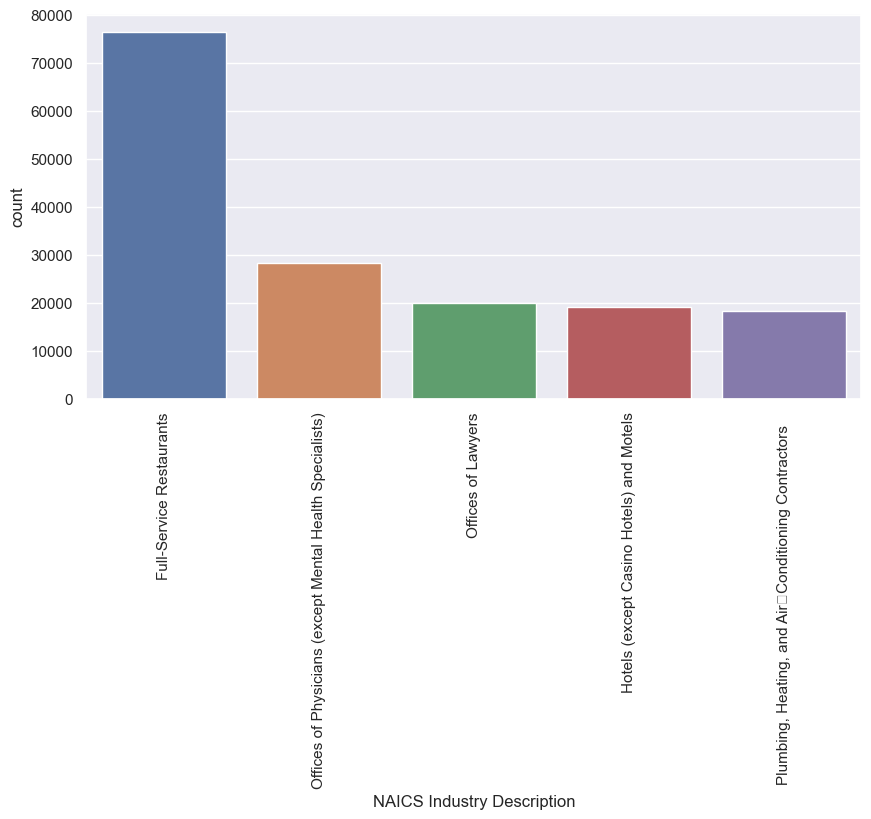

In [210]:


# identify top 5 lenders
counts = df['NAICS Industry Description'].value_counts()

# Select the top 5 categories
top_categories = counts[:5].index.tolist()

# Create a countplot for the top 5 categories with vertical x-axis labels
sns.countplot(x='NAICS Industry Description', data=df[df['NAICS Industry Description'].isin(top_categories)], order=top_categories)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'JPMorgan Chase Bank, National Association'),
  Text(1, 0, 'Bank of America, National Association'),
  Text(2, 0, 'Truist Bank'),
  Text(3, 0, 'PNC Bank, National Association'),
  Text(4, 0, 'Manufacturers and Traders Trust Company')])

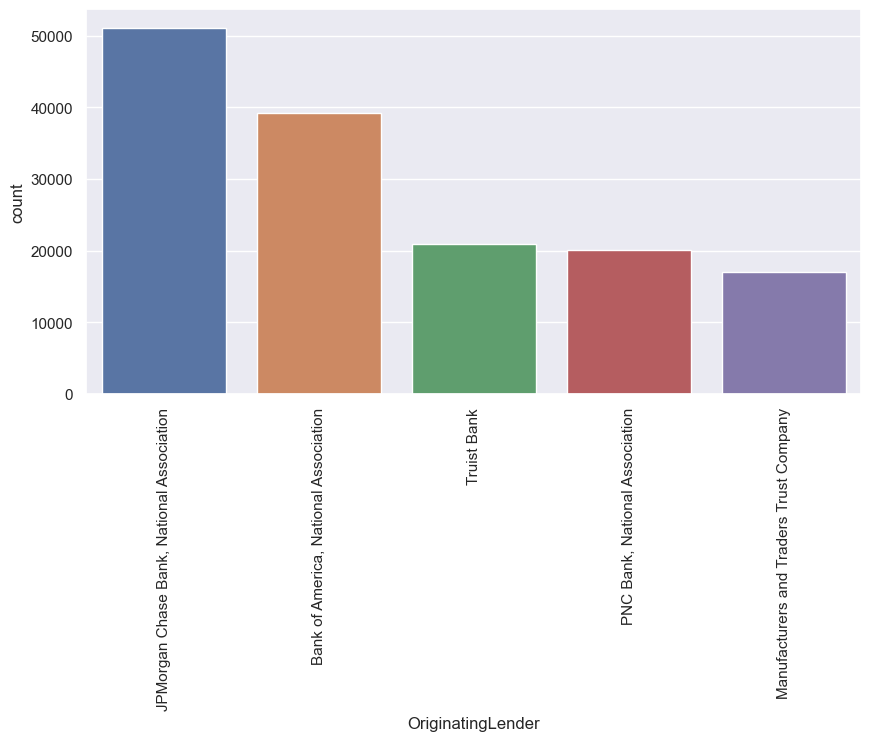

In [211]:
# identify top 5 lenders
counts = df['OriginatingLender'].value_counts()

# Select the top 5 categories
top_categories = counts[:5].index.tolist()

# Create a countplot for the top 5 categories with vertical x-axis labels
sns.countplot(x='OriginatingLender', data=df[df['OriginatingLender'].isin(top_categories)], order=top_categories)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'JPMorgan Chase Bank, National Association'),
  Text(1, 0, 'Bank of America, National Association'),
  Text(2, 0, 'PNC Bank, National Association'),
  Text(3, 0, 'Truist Bank'),
  Text(4, 0, 'Manufacturers and Traders Trust Company')])

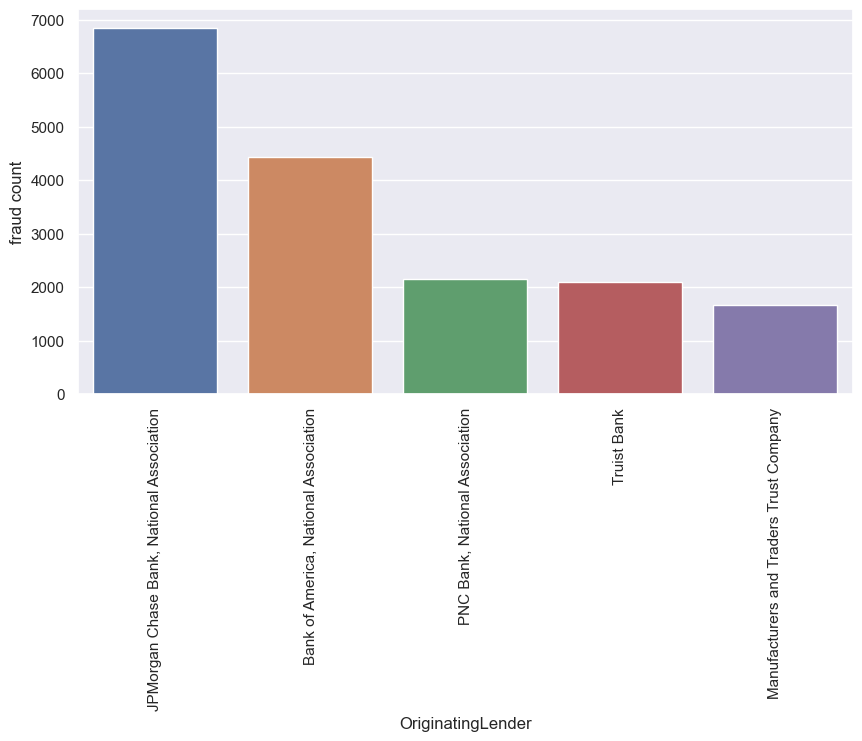

In [212]:
#Identify top five lenders who did fraud

frauds_by_lender = df[df['Is_Fraud'] == 1].groupby('OriginatingLender').size().reset_index(name='fraud count')

# Sort the results by count and select the top 5 lenders
top_lenders = frauds_by_lender.sort_values(by='fraud count', ascending=False).head(5)

# Create a barplot of the top 5 lenders with vertical x-axis labels
sns.barplot(x='OriginatingLender', y='fraud count', data=top_lenders)
plt.xticks(rotation=90)


In [213]:
FirstRound=df.loc[df['ProcessingMethod']=='PPP']
SecondRound=df.loc[df['ProcessingMethod']=='PPS']

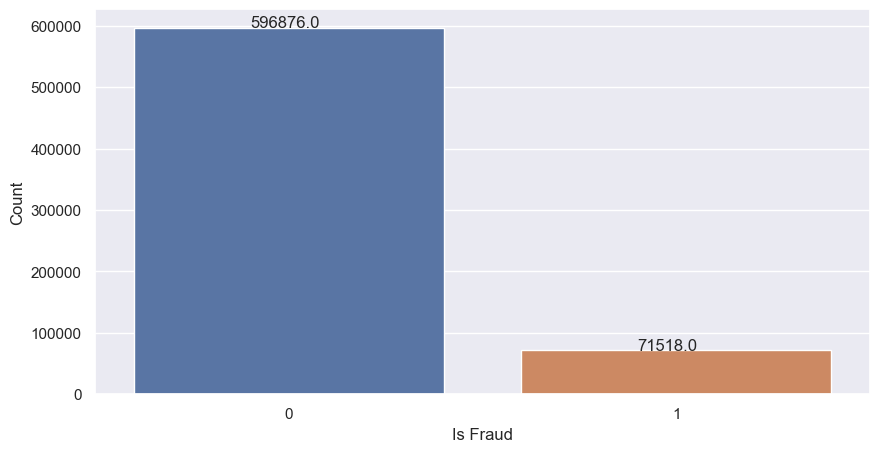

In [214]:
#frauds in First Round
ax = sns.countplot(data=FirstRound, x='Is_Fraud')

# Label the axes
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

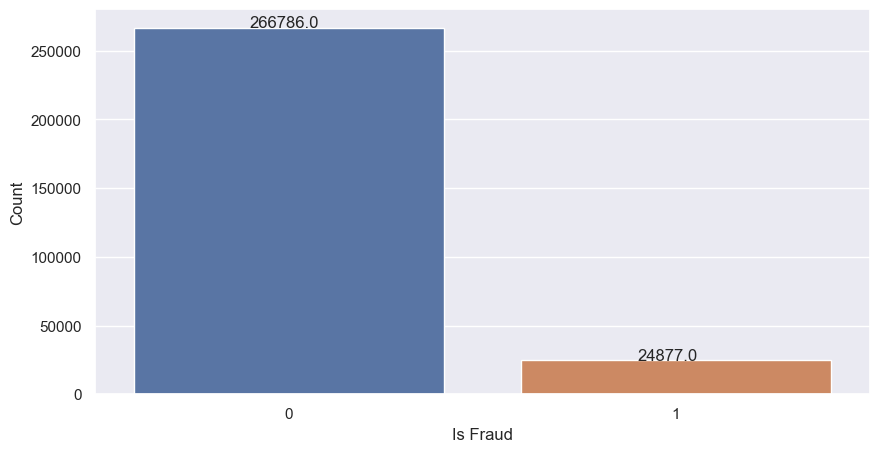

In [215]:
#frauds in First Round
ax = sns.countplot(data=SecondRound, x='Is_Fraud')

# Label the axes
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.3, p.get_height() + 0.5))

# Show the plot
plt.show()

### % of fraud loans issued both by amount


In [216]:
column_sums = df['CurrentApprovalAmount'].sum()

print("CurrentApprovalAmount:",column_sums)
column_sums_b=column_sums/1000000000
print("CurrentApprovalAmount in billions:",column_sums_b)

fraud_df = df[df['Is_Fraud'] == 1] # select only the rows where is_fraud is 1
fraud_CAA_sum = fraud_df['CurrentApprovalAmount'].sum()

print("Fraud loan approved amount:",fraud_CAA_sum)
fraud_CAA_b=forgiveness_sum/1000000000
print("Fraud loan approved amount: in billions:",fraud_CAA_b)

fraud_amount_percent=fraud_CAA_b/column_sums_b
print("% of fraud loans issued both by amount",fraud_amount_percent*100)



CurrentApprovalAmount: 510388406009.3
CurrentApprovalAmount in billions: 510.3884060093
Fraud loan approved amount: 121633664550.96
Fraud loan approved amount: in billions: 115.56736835858
% of fraud loans issued both by amount 22.64302382222887


### Minimum loans having atleast one fraud flag

In [217]:
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,Deviant_loan_amount_per_employee,Deviant LAPE Risk Score,Total Average Risk Score,Is_Fraud_business_start_date,Is_Fraud_JobsReported,is_Fraud_duplicate,Is_Fraud_risk_avg,Is_Fraud,anomaly_score,Is_Fraud_Anomaly
858306,7496047207,2020-04-28,610,PPP,"GENESIS RESOURCES, LLC",2435 North Central Expressway,Richardson,TX,75080,2021-06-10,...,0.260215,0.519049,0.492896,0,0,0,0,0,0.349319,1
581363,9655287108,2020-04-15,299,PPP,KAM MAN SUPERMARKET LLC,200 STATE ROUTE 10,EAST HANOVER,NJ,07936,2021-09-29,...,0.042300,0.091334,0.493526,0,0,0,0,0,0.349319,1
779878,1577258408,2021-02-02,165,PPS,CHURCHILL & BANKS COMPANIES LLC,10 Greene St,Providence,RI,02903-3232,2022-03-11,...,0.319820,0.613546,0.487673,0,0,0,0,0,0.349272,1
858108,8753077408,2020-05-19,671,PPP,"COASTWIDE MARINE SERVICES, LLC",16303 Avenue D,Channelview,TX,77530,2021-08-11,...,0.251003,0.503485,0.490721,0,0,0,0,0,0.349272,1
779879,5855487007,2020-04-06,165,PPP,CHURCHILL & BANKS COMPANIES LLC,10 GREENE ST,PROVIDENCE,RI,02903-3232,2021-06-24,...,0.319877,0.613630,0.487722,0,0,0,0,0,0.349272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810634,4688397001,2020-04-04,678,PPP,VENABLE'S WELDING & ROUSTABOUT,7410 CONTINENTAL PKWY,AMARILLO,TX,79119-6740,2022-02-10,...,1.909198,0.991042,0.994154,0,0,0,1,1,-0.095160,0
560561,8015747003,2020-04-08,299,PPP,APPLE FOOD SERVICE OF NEW JERSEY LLC,7 PEARL CT,ALLENDALE,NJ,07401-1610,2021-07-23,...,49.898428,0.999904,0.899547,0,0,0,1,1,-0.095160,0
2675,1517597200,2020-04-15,459,PPP,ACTION ENTERPRISE HOLDINGS LLC,204 20TH ST N,BIRMINGHAM,AL,35203-3610,2021-08-05,...,NaN,NaN,0.999396,0,0,0,1,1,-0.095160,0
605898,7569987307,2020-04-30,202,PPP,COUNTY AGENCY INC.,129 S 8th St,Brooklyn,NY,11211-6119,NaT,...,28.378180,0.999788,0.901129,0,0,0,1,1,-0.096776,0


In [218]:

# Assuming the dataset is stored in a DataFrame named df
mask_1 = df['Is_Fraud'] == 1
mask_2 = df['Is_Fraud_risk_avg'] == 1


count_1 = mask_1.sum()
count_2 = mask_2.sum()

min_count = min(count_1, count_2)

percentage = min_count / len(df)

print("Minimum count:", min_count)
print("Percentage of minimum fraud:", percentage)


Minimum count: 95985
Percentage of minimum fraud: 0.09997843878019742


### More than 9% of PPP loans had at least one indication of potential fraud